# FINAL PROJECT 4 : CLUSTERING CREDIT CARD COSTUMER

##A. Introduction

### Our Members:
</br>
a. Nama: Leticia
</br>
ID: PYTN-KS20-023
</br>
</br>
b. Nama: Javier Al Faiza
</br>
   ID: PYTN-KS20-013
</br>
</br>
c. Nama: Novita Nurul Hidayati
</br>
ID: PYTN-KS20-021

### Abstract

<p style='text-align: justify;'>
    Keberadaan kartu kredit sudah dikenal sejak lama, namun model transaksi keuangan saat ini membuat kartu kredit menjadi jauh lebih berguna dan nyaman. Tapi apa sebenarnya kartu kredit itu? Secara sederhana,  kartu kredit diartikan sebagai alat pembayaran berupa kartu yang biaya pembayarannya dalam suatu transaksi keuangan ditanggung terlebih dahulu oleh  penerbit kartu. Setelah itu, pemegang kartu kredit wajib melunasi hutang pembayaran kartu tepat waktu yang telah disepakati sebelumnya. Kartu kredit berbeda dari kartu debit uang asli nasabah, sehingga kartu kredit dapat menawarkan manfaat unik bagi orang yang menggunakannya. Namun, dalam banyak hal, kartu kredit tidak berbeda dengan kartu debit.Perbedaannya hanya pada modal yang digunakan. Dana kartu kredit adalah saldo terutang yang dibatasi hingga jumlah tertentu.</p>

<p style='text-align: justify;'>
Pemegang kartu kredit akan dikenakan biaya tertentu atas penggunaan kartu kredit tersebut. Biaya tahunan dibebankan kepada pengguna kartu kredit sesuai dengan fasilitas yang diberikan oleh  bank. Dalam banyak kasus, biaya tahunan  tahun pertama sering kali diabaikan untuk keuntungan tambahan bagi pengguna kartu kredit. Selain itu, ada  biaya keterlambatan dan bunga. Biaya keterlambatan pembayaran dikenakan jika pemegang kartu terlambat membayar tagihan. Selama periode ini, bunga akan dikenakan jika nasabah menggunakan kartu untuk pembayaran kredit atau cicilan. Jika nasabah melebihi batas kartu kreditnya, nasabah juga akan dikenakan biaya.</p>
    
<p style='text-align: justify;'>
Selain biaya tersebut, terdapat biaya tambahan untuk beberapa layanan yang ditawarkan oleh kartu kredit, seperti biaya penarikan tunai dan  informasi pembayaran. Biaya penarikan tunai biasanya dikenakan jika Anda menggunakan kartu kredit untuk menarik dana. Sedangkan biaya informasi pembayaran akan dikenakan apabila nasabah membutuhkan informasi pembayaran yang detail dan lengkap. Jika memungkinkan, pilihlah kartu kredit tanpa biaya bulanan agar lebih ringan.</p>


### Data

<p style='text-align: justify;'>
    Dataset yang digunakan yaitu <b>Credit Card Data</b> yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut, antara lain: </p>

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user


### Objective
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

##B. Import Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from pylab import bone, pcolor, colorbar, plot, show

# K-Means Clusterinng
from sklearn.cluster import KMeans

#DBSCAN
from sklearn.cluster import DBSCAN

# DBScan Clustering
from sklearn.cluster import DBSCAN

# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Visualization Hierarchy diagram
import scipy.cluster.hierarchy as shc

import pickle
import warnings
warnings.filterwarnings("ignore")

bold = '\033[1m'
normal = '\033[0m'

##C. Data Loading

###Import Dataset
</br> Import dilakukan dari Google Drive karena Tugas ini dikerjakan melalui Google Colab

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Membaca data pada file .csv dan menampilkan dataset tanpa memotong tampilan frame DataFrame pada kolomnya**

In [81]:
df = pd.read_csv('/content/drive/MyDrive/Dataset_fp4/CC-GENERAL.csv',)
pd.set_option("display.max.columns", None)

**Menampilkan 10 data pertama**

In [82]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**Menampilkan 10 data terakhir**

In [83]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


### Jumlah Baris dan Kolom pada Dataset

In [84]:
x = df.shape[0]
y = df.shape[1]

print('Jumlah Baris: ', x, '\nJumlah Kolom: ', y)

Jumlah Baris:  8950 
Jumlah Kolom:  18


### Kolom

In [85]:
#Melihat nama-nama kolom yang ada pada dataset
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

### Tipe Data dari Setiap Kolom Dataset

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Memeriksa Missing Values

In [87]:
#Mengecek missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

###Memeriksa Data Duplikat

In [88]:
#Mengecek data duplikat
df.duplicated().sum()

0

##D. Data Cleaning

###Meng-handle Missing Values

In [89]:
#Meng-handle missing values dengan mean
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [90]:
#Mengecek kembali apakah masih terdapat missing value
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

###Meng-handle Tingkat Skewness

Tujuan utama melakukan penanganan pada skewed data adalah untuk mencapai distribusi yang lebih seimbang atau normal antara nilai-nilai atribut yang ada. Skewed data mengacu pada situasi di mana distribusi nilai atribut tidak terdistribusi secara merata atau simetris, melainkan memiliki kemiringan atau kecenderungan tertentu. Tujuan dari melakukan penanganan terhadap skewed data adalah:

1. Mengurangi Bias
2. Meningkatkan Performa Model
3. Memperbaiki Prediksi
4. Meningkatkan Interpretasi dan Analisis
5. Mengoptimalkan Pengambilan Keputusan

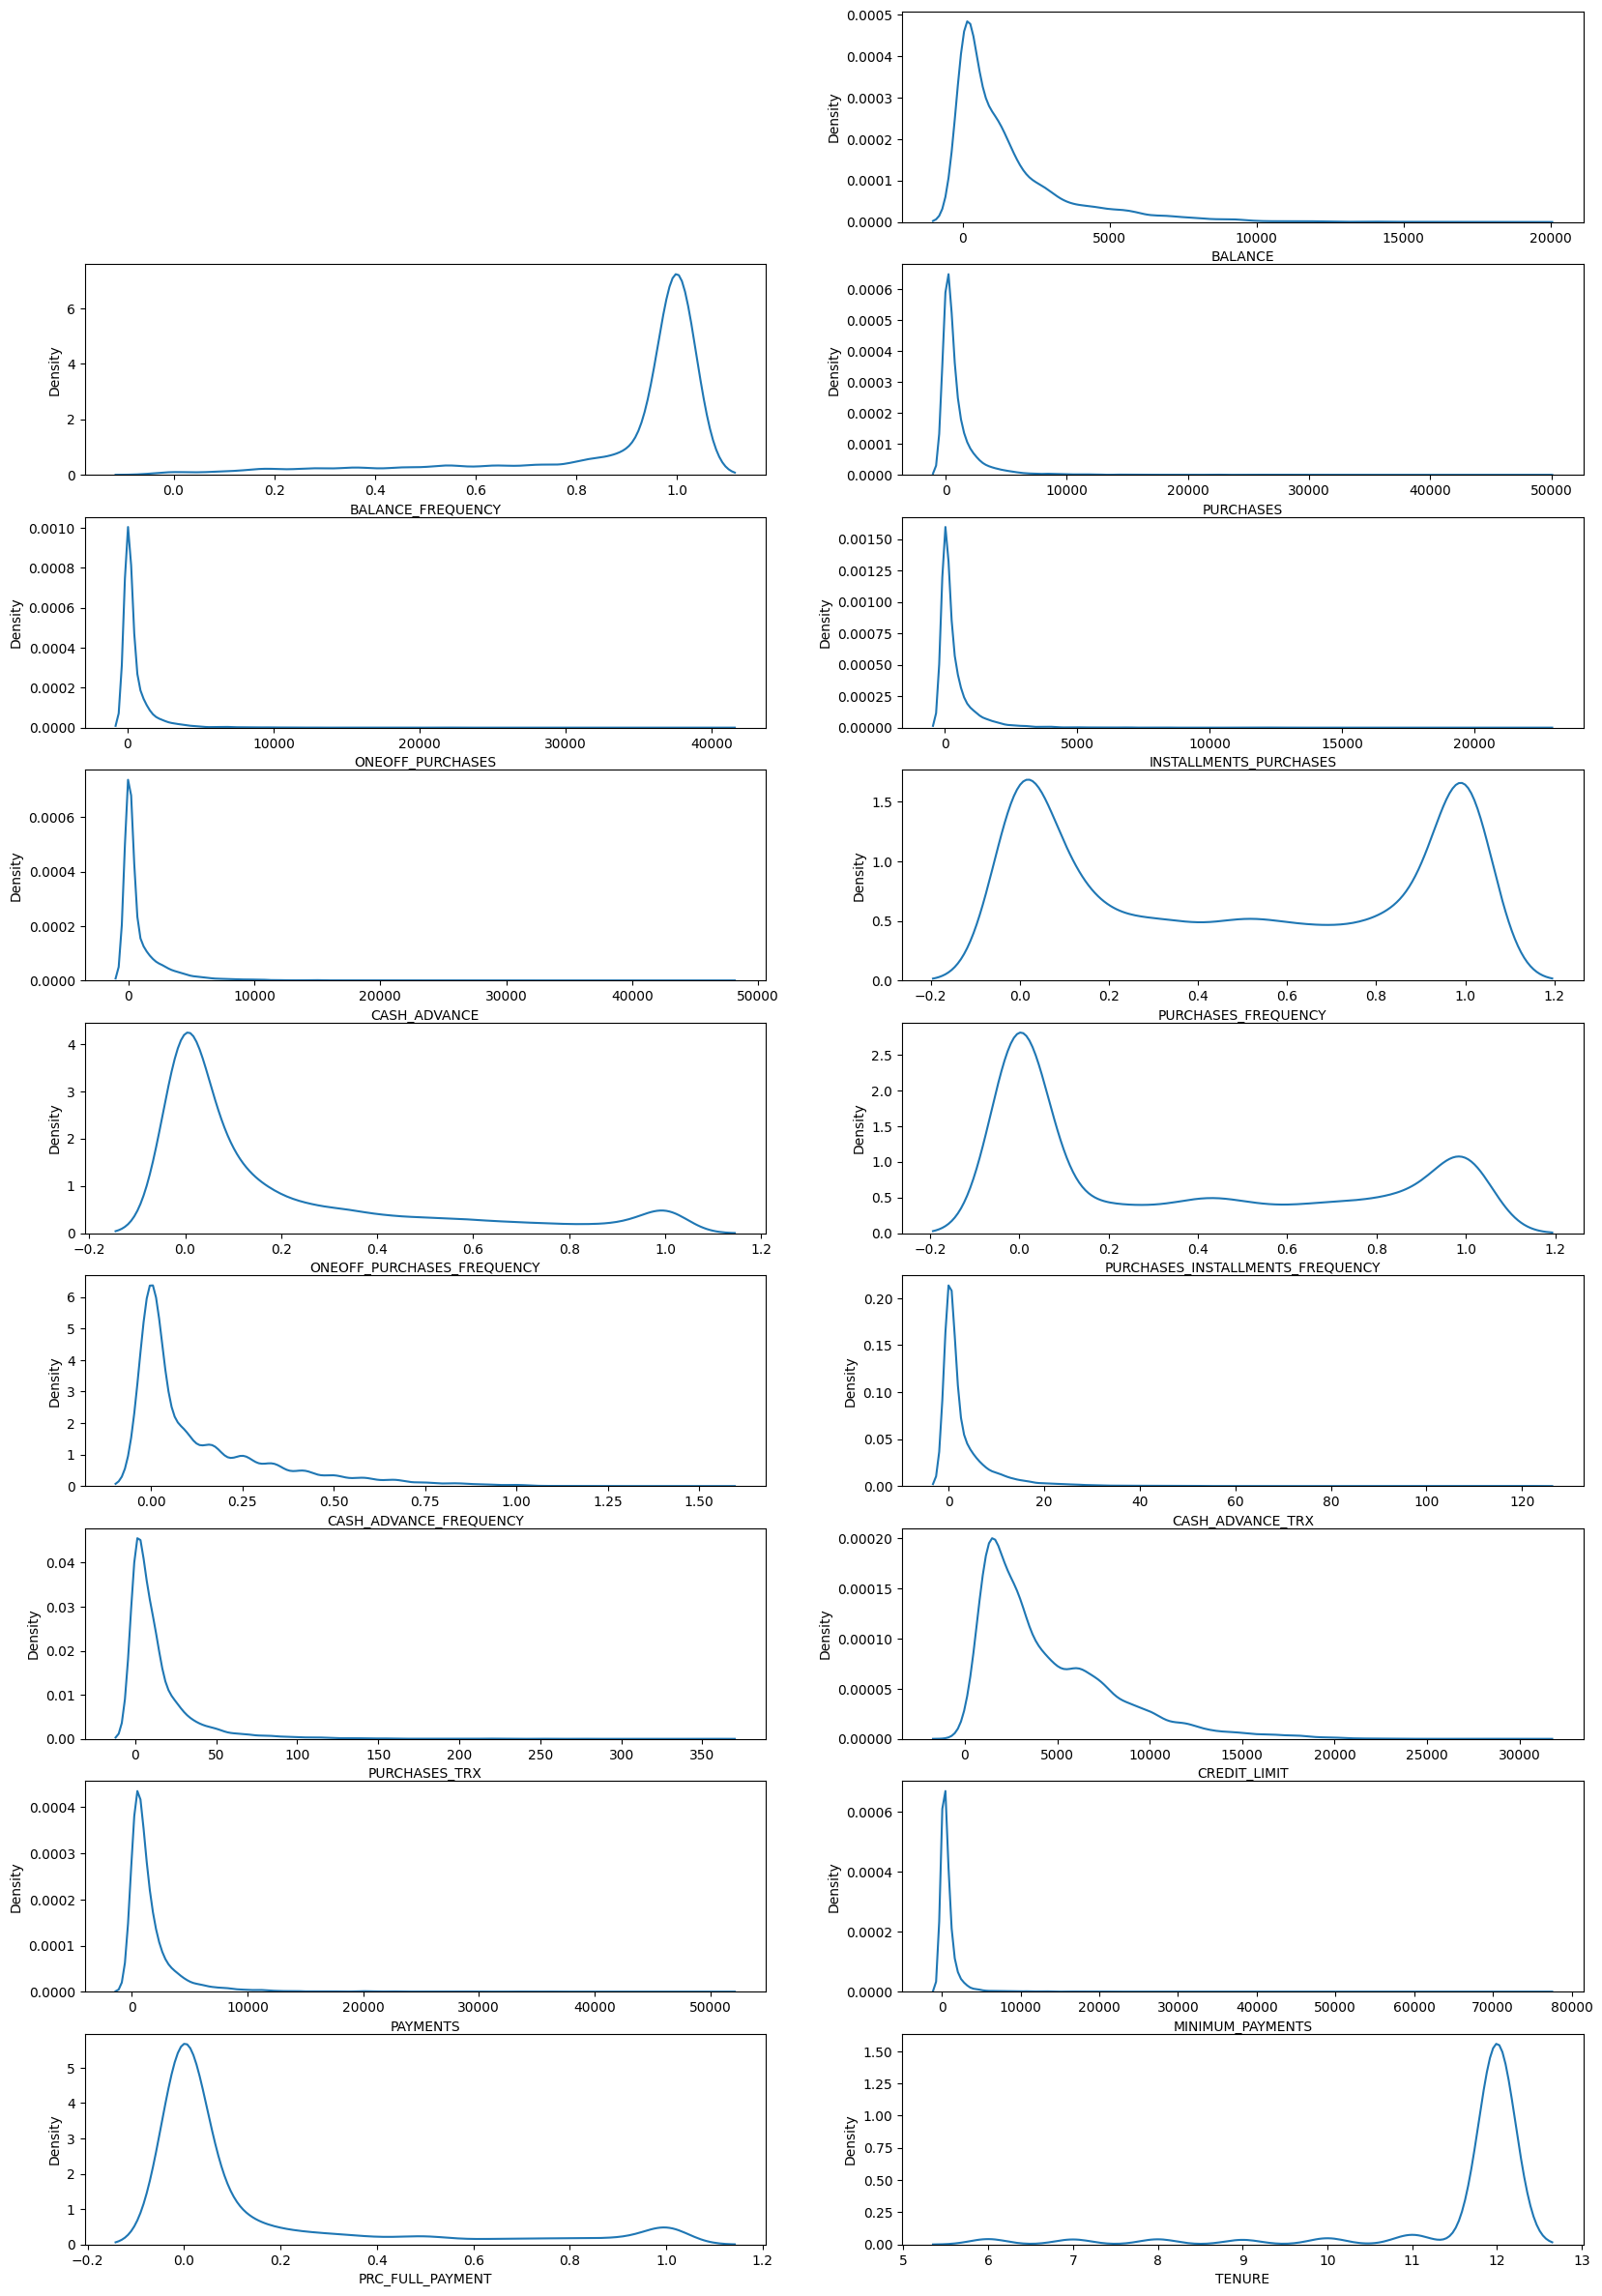

In [91]:
plt.figure(figsize=(20,30))

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

In [92]:
positive_skew = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

Positive skewed merujuk pada pola distribusi data yang ekor distribusi datanya cenderung lebih panjang di sebelah kanan. Dalam positive skewed, nilai-nilai yang lebih rendah cenderung terkumpul di sebelah kiri grafik distribusi, sedangkan nilai-nilai yang lebih tinggi merentang ke arah kanan.
<br>
<br>
Salah satu cara yang umum digunakan untuk menangani positive skewed-data adalah transformasi logaritmik. Transformasi logaritmik dapat membantu menyebarkan nilai-nilai yang tinggi ke dalam rentang yang lebih kecil dan mengurangi perbedaan skala antara nilai-nilai yang ekstrem.

In [93]:
df_new = df.copy()

for col in positive_skew:
    df_new[col] = np.log(1 + df_new[col])

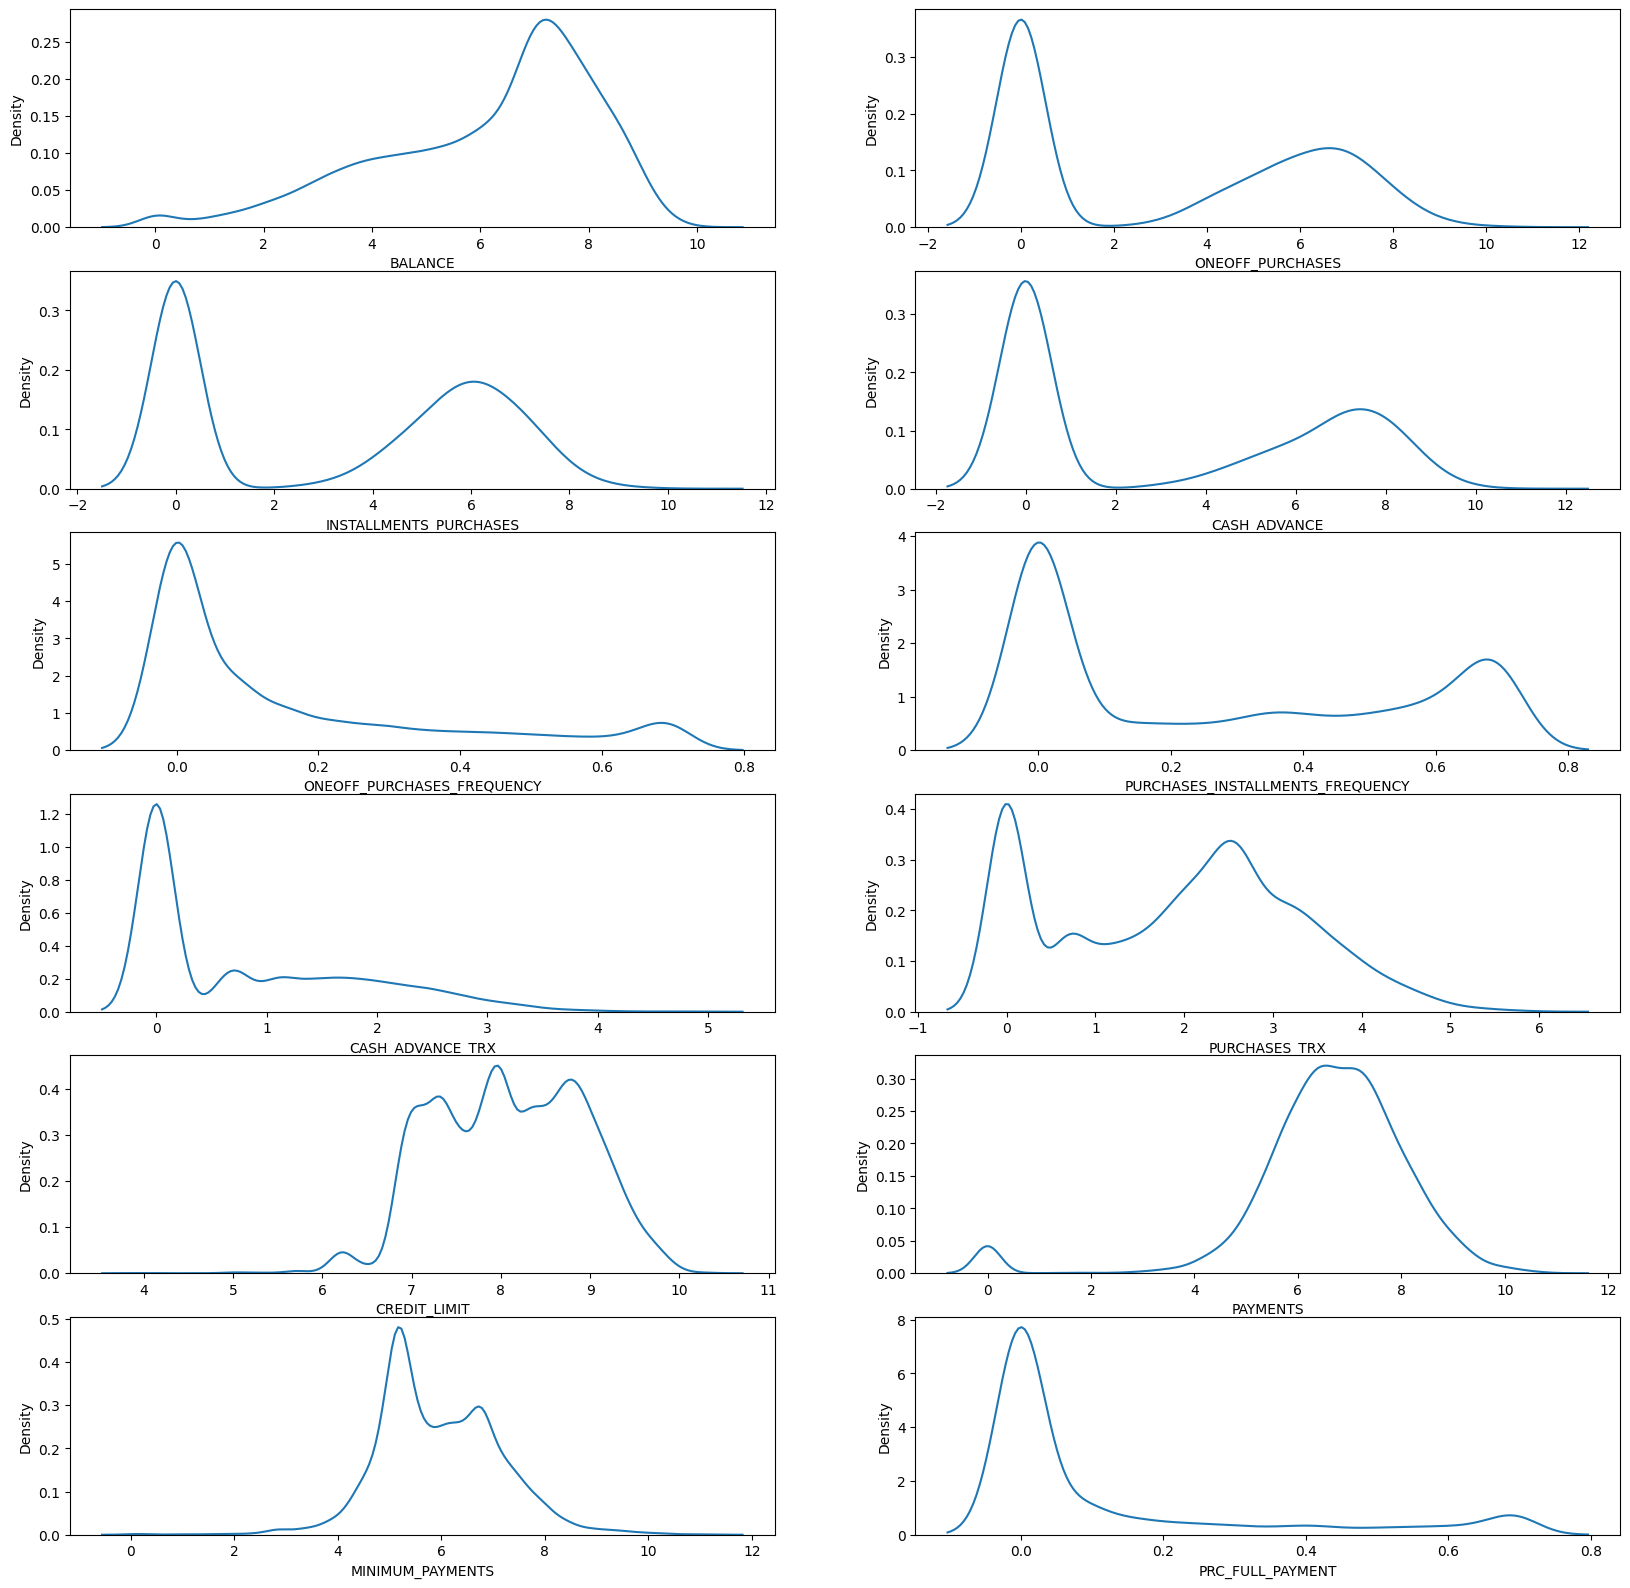

In [94]:
plt.figure(figsize=(20,30))

for i, col in enumerate(positive_skew):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df_new[col], ax=ax)
    plt.xlabel(col)

plt.show()

##E. Data Exploration

### Melihat Statistik Data

In [95]:
## Melihat statistik data seperti count, mean, standard deviation, maximum, mininum, dan quartile
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Correlation Data and Visualization

In [96]:
#Melihat korelasi pada dataset
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


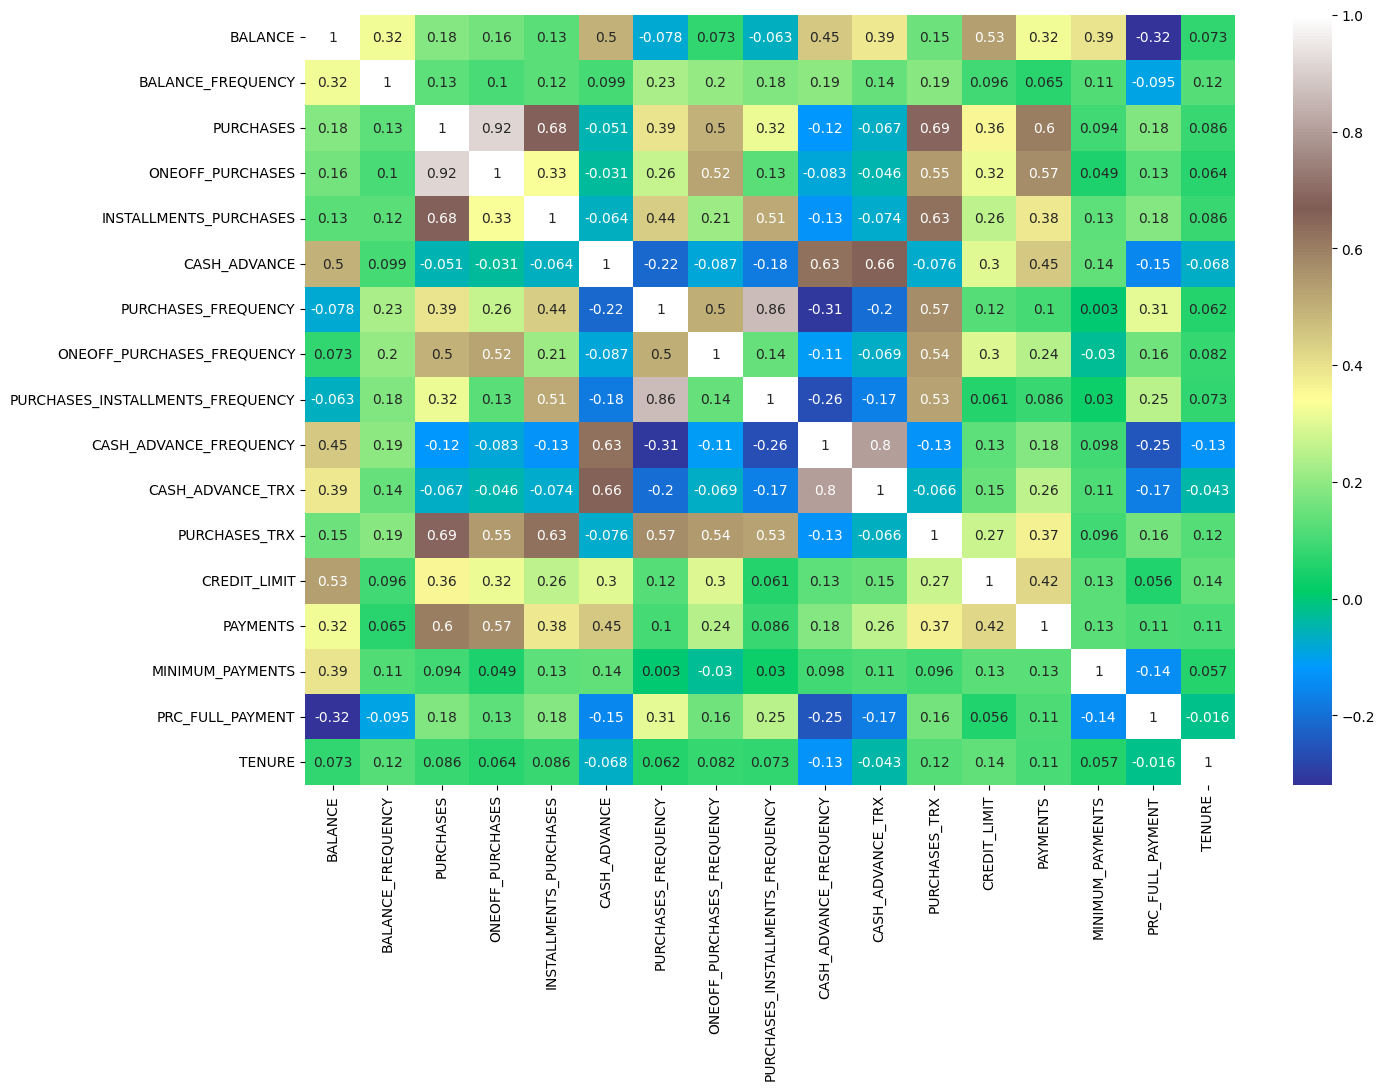

In [97]:
#Memvisualisasikan korelasi yang ada pada dataset
df_corr=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, annot=True,cmap='terrain')

# Save Plot
plt.savefig("corr_chart.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')



*   Korelasi yang paling lemah adalah antara PRC_FULL_PAYMENT dengan BALANCE yaitu (-0.32)
*   Korelasi yang paling mendekati angka 1 adalah antara ONOFF_PURCHASES dengan PURCHASES yaitu (0.92)



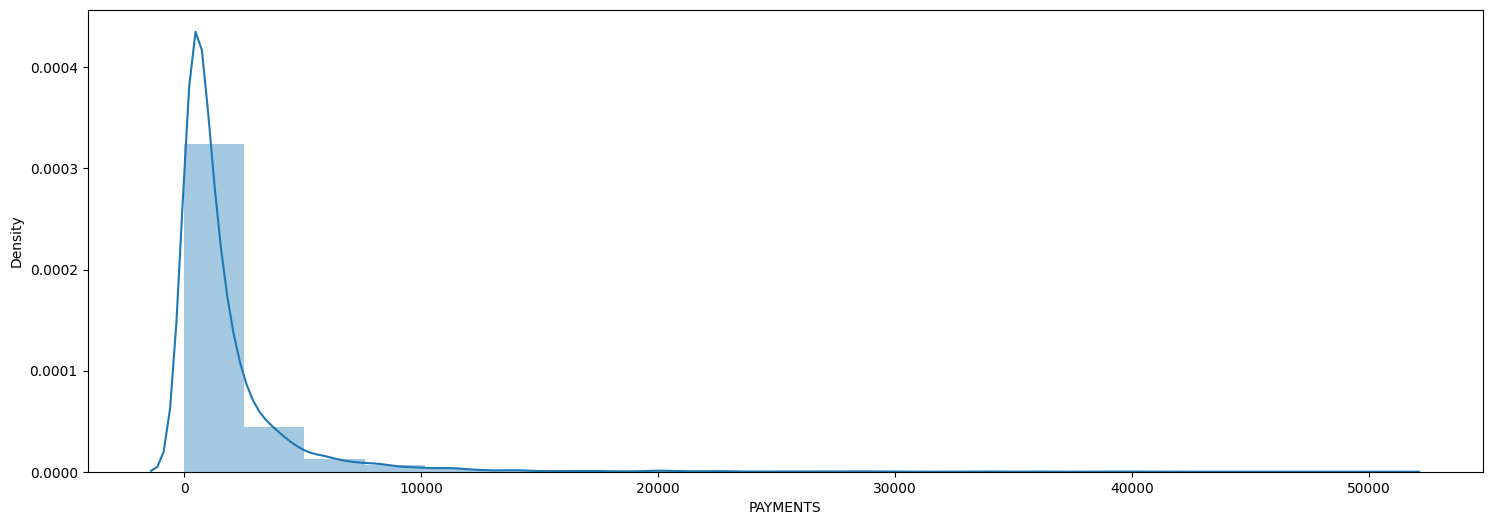

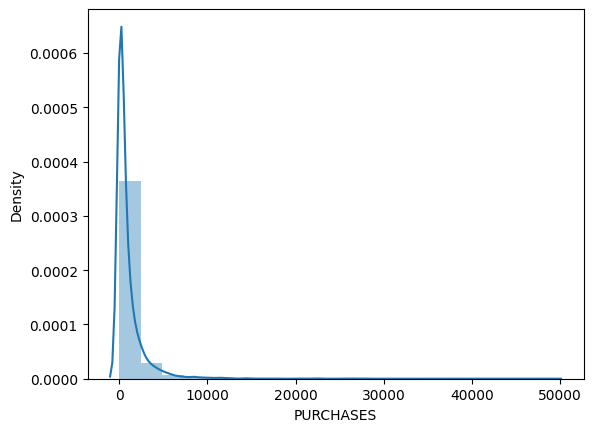

In [98]:
# Menampilkan distribusi data untuk atribut PAYMENTS dan PURCHASES
plt.figure(figsize=(18,6))
sorted_creditcard_data1 = df.sort_values(by='PAYMENTS', ascending=True)
sorted_creditcard_data2 = df.sort_values(by='PURCHASES', ascending=True)


p1=sns.distplot(sorted_creditcard_data1['PAYMENTS'], bins=20, kde=True)
plt.show(p1)

p2=sns.distplot(sorted_creditcard_data2['PURCHASES'], bins=20, kde=True)
plt.show(p2)

Visualisasi data di atas ditampilkan dengan distplot untuk melihat distrbusi data pada kolom PAYMENTS dan PURCHASES karena kedua kolom tersebut memiliki korelasi yang sangat kuat dalam menentukan seberapa tertarik customer dalam menggunakan creditcard

### Variability

In [99]:
#Variance
var = np.var(df_new['PURCHASES_INSTALLMENTS_FREQUENCY'], ddof=1)
print("Variance of PURCHASES_INSTALLMENTS_FREQUENCY: ", var)

#Standard Deviation
std = np.std(df_new['PURCHASES_INSTALLMENTS_FREQUENCY'], ddof=1)
print("Standard Deviation of PURCHASES_INSTALLMENTS_FREQUENCY: ", std)

#Skewness
z = df_new['PURCHASES_INSTALLMENTS_FREQUENCY']
z.skew()
print("Skewness: ", z.skew())

#Percentiles
percentile = np.percentile(z, [25, 50, 75])
print("Percentile: ", percentile)

#Ranges
range_ = np.ptp(z)
print("Range: ", range)

Variance of PURCHASES_INSTALLMENTS_FREQUENCY:  0.07944062161333851
Standard Deviation of PURCHASES_INSTALLMENTS_FREQUENCY:  0.2818521272109517
Skewness:  0.3736199292021055
Percentile:  [0.         0.15415097 0.55961579]
Range:  <class 'range'>


Dari hasil di atas, bisa diketahui nilai varians, standar deviasi, skewness, percentiles dan range untuk atribut PURCHASES_INSTALLMENTS_FREQUENCY.

##F. Data Preprocessing

###Menghapus Fitur/Kolom yang tidak diperlukan

In [100]:
#Menghapus kolom CUST_ID
df.drop(columns=["CUST_ID"], inplace=True)

#Melihat 10 data teratas
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**Kolom CUST_ID dihapus karena kolom tersebut berisi ID Customer yang datanya tidak digunakan dalam pengerjaan kali ini**



In [101]:
df_deploy = df.copy()
df_test = df.copy()
df_copy = df.copy()
df_copy2= df.copy()

###Scalling Data

In [102]:
## Melihat statistik data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [103]:
x = [i for i in df.columns]

In [104]:
scaler = StandardScaler()
df[x] = scaler.fit_transform(df[x])
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


**Scalling Data pada pengerjaan kali ini dilakukan dengan Standard Scalling yaitu mengelompokkan data berdasarkan nilai mean dan standard deviation.**
<br>
<br>
**Scalling data bertujuan untuk menyesuaikan rentang nilai pada dataset agar mudah diproses oleh algoritma Machine Learning. Karena apabila ada kolom tertentu yang memiliki rentang nilai yang jauh dibading dengan kolom lainnya, maka hal itu bisa mempengaruhi kinerja algoritma tertentu.**

In [105]:
data_scaled = normalize(df_copy)
data_scaled = pd.DataFrame(data_scaled, columns=df_copy.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


##G. Pendefinisian Model

### Model 1: DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah algoritma yang digunakan untuk mengelompokkan data berdasarkan kerapatan. Sebagai contoh sederhana, mari kita pertimbangkan penggunaan DBSCAN dalam mengelompokkan titik-titik koordinat dalam bidang dua dimensi. DBSCAN bekerja dengan cara yang berbeda dibandingkan dengan metode clustering lainnya seperti K-Means atau Hierarchical Clustering. Alih-alih mencoba mengelompokkan data berdasarkan jumlah cluster tertentu, DBSCAN mengidentifikasi cluster secara dinamis berdasarkan kerapatan data.

In [106]:
# Membuat model untuk DBSCAN
dbs = DBSCAN(eps=2,min_samples=6)

###Model 2: K-Means


K-Means adalah salah satu algoritma clustering dalam analisis data yang digunakan untuk mengelompokkan titik-titik data ke dalam kelompok berdasarkan kesamaan atribut atau fitur. Tujuan utama K-Means adalah untuk membagi data menjadi beberapa kelompok (cluster) sedemikian rupa sehingga titik-titik data dalam satu kelompok memiliki kesamaan yang tinggi dan berbeda secara signifikan dari titik-titik data dalam kelompok lain.

In [107]:
# Membuat model untuk K-Means
km = KMeans(n_clusters = 6,init ='k-means++', max_iter=300,random_state=35)

###Model 3: Hierarchical Clustering

Hierarchical Clustering adalah salah satu algoritma clustering dalam analisis data yang digunakan untuk mengelompokkan objek data ke dalam hierarki atau struktur berjenjang. Tujuan utama dari hierarchical clustering adalah untuk menghasilkan representasi berhierarki dari bagaimana objek-objek data berhubungan satu sama lain berdasarkan kesamaan mereka.

In [108]:
# Membuat model untuk Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

## H. Evaluasi Model

Dalam pengerjaan kali ini, tidak ada Pelatihan model dikarenakan 3 jenis model yang akan digunakan merupakan model Unsupervised Learning dimana algoritma unsupervised learning  digunakan untuk menganalisis dan mengelompokkan data berdasarkan kesamaan atau struktur internal data, tanpa memerlukan label target. Sehingga, ketiga model tersebut bisa langsung digunakan untuk dievaluasi

###Model 1: DBSCAN

In [109]:
model1 = dbs.fit(data_scaled)
y_pred1 = dbs.labels_
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
#Memprediksi Clusters untuk data dan membuat kolom baru bernama Clusters serta menampilkan 10 kolom teratas
dbs_df = pd.DataFrame(df_copy2,columns = df_copy2.columns)
dbs_df['CLUSTERS'] = y_pred1
dbs_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


In [111]:
#Menampilkan 10 kolom terakhir
dbs_df.tail(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6,0
8941,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6,0
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6,0
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0


In [112]:
# Melihat statistik data seperti count, mean, standard deviation, maximum, mininum, dan quartile
dbs_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,0.0
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.0
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,0.0
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,0.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,0.0


In [113]:
#Mengonversi kolom Balance dan Purchases ke bentuk numpy array
Y = dbs_df[['BALANCE','PURCHASES']].to_numpy()

In [114]:
dbs = DBSCAN(eps=0.075,min_samples=2)
dbs.fit(Y)
y_dbs_pred = dbs.labels_
y_dbs_pred

array([-1, -1, -1, ..., -1, 85, -1])

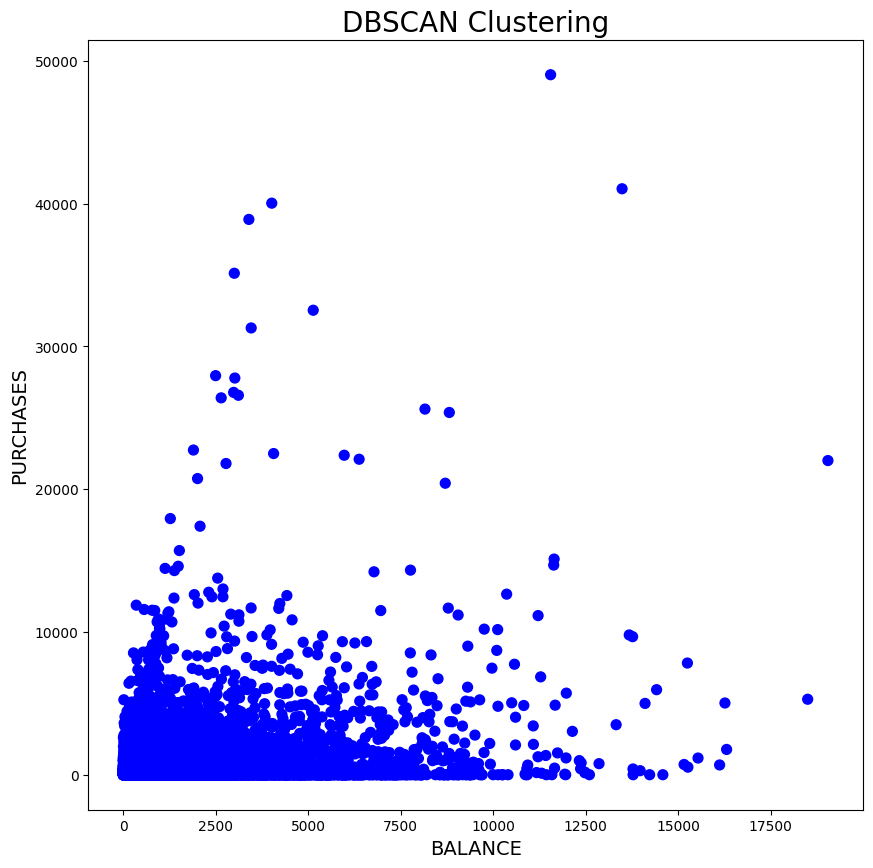

In [115]:
plt.figure(figsize=(10, 10))
colors = ['blue']

# Mengganti label cluster dengan indeks cluster
cluster_indices = dbs_df['CLUSTERS'].astype(int)

plt.scatter(dbs_df['BALANCE'], dbs_df['PURCHASES'], c=[colors[i] for i in cluster_indices], s=50)

plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('BALANCE', fontsize=14)
plt.ylabel('PURCHASES', fontsize=14)
plt.show()


###Model 2: K-Means

In [116]:
model2=km.fit(df)
y_pred2 = km.predict(df)

In [117]:
#Memprediksi Clusters untuk data dan membuat kolom baru bernama Clusters serta menampilkan 10 kolom teratas
clus_df = pd.DataFrame(df,columns = df.columns)
clus_df['CLUSTERS'] = y_pred2
clus_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,3
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,2
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,3
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,3
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740557,-0.115060,6.621186e-01,-0.525551,0.36068,1
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,2.475134,1.596313,-2.858411e-01,2.893453,0.36068,0
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,-0.109020,-0.603134,-0.364116,-1.425353e-01,-0.525551,0.36068,1
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,-0.476070,-0.390639,0.688639,-0.360933,-2.369677e-01,-0.525551,0.36068,3
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,-0.476070,-0.471102,1.788021,-0.196336,-3.277915e-01,-0.525551,0.36068,4


In [118]:
#Melihat informasi detail dari clus_df
clus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [119]:
#Menghitung jumlah values yang ada pada clus_df
clus_df['CLUSTERS'].value_counts()

3    3038
1    2230
0    1318
4    1312
2     971
5      81
Name: CLUSTERS, dtype: int64

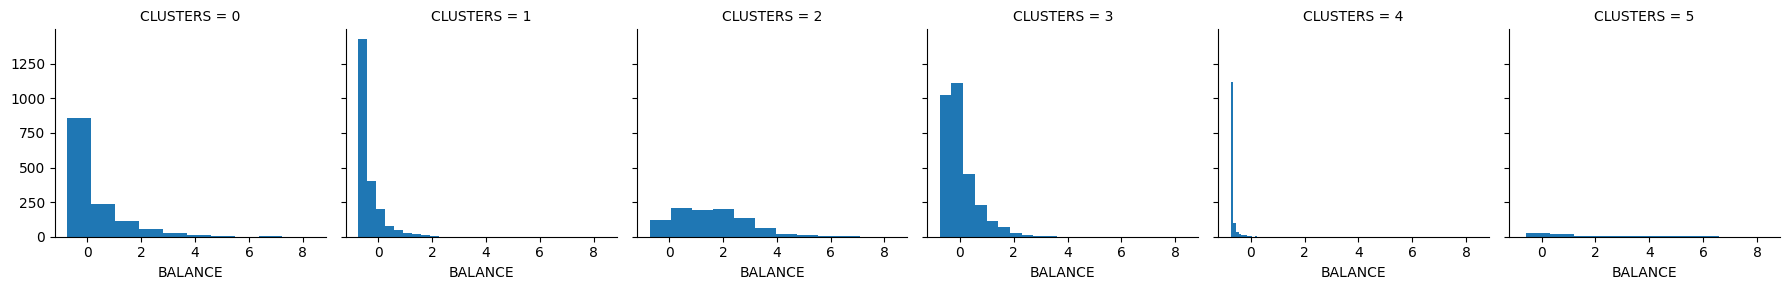

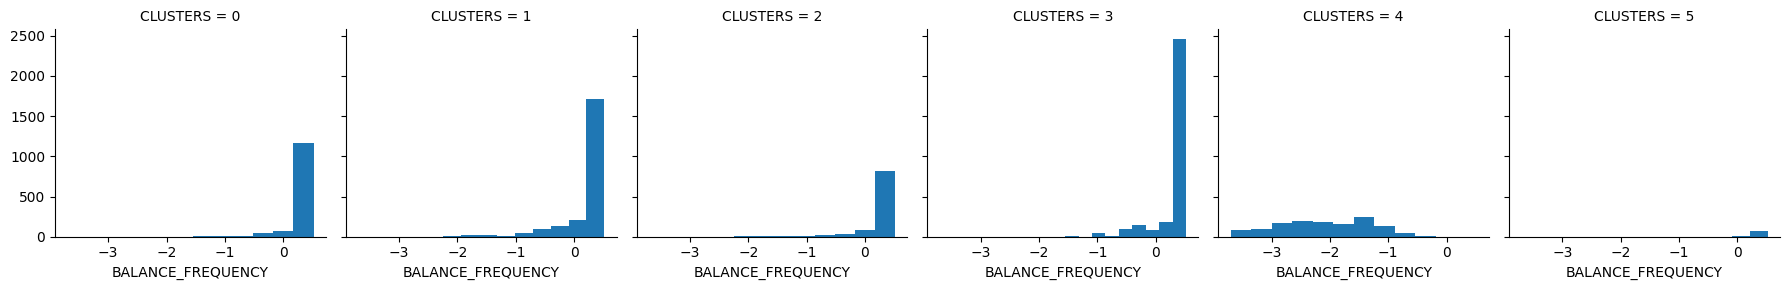

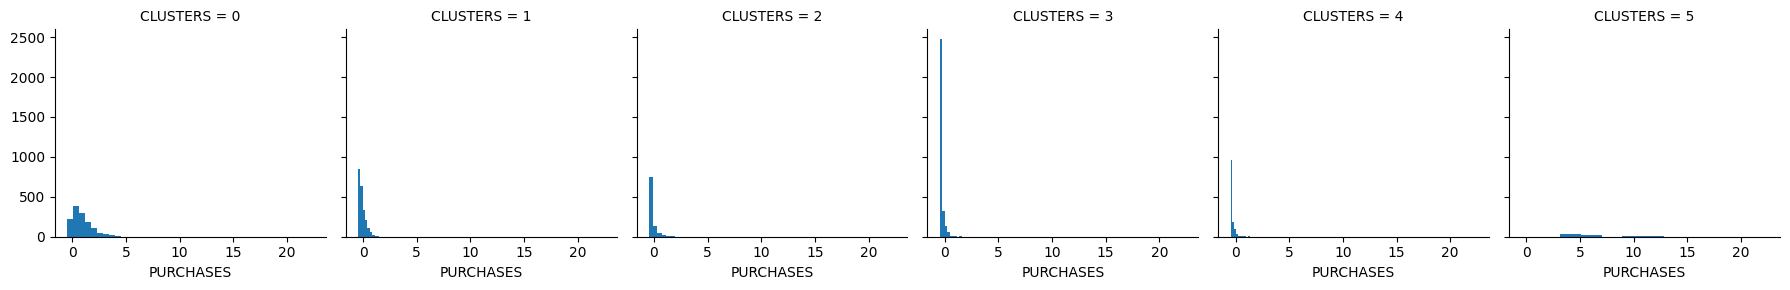

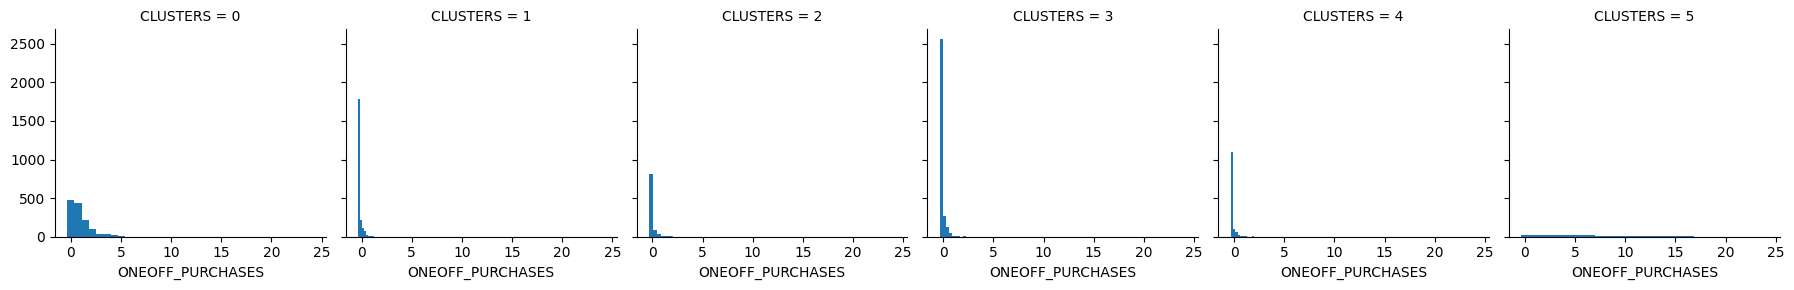

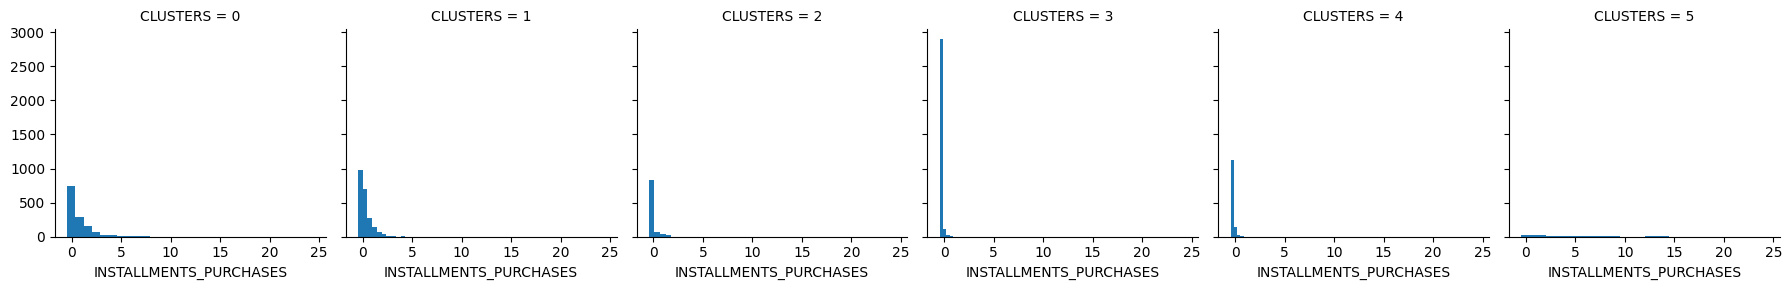

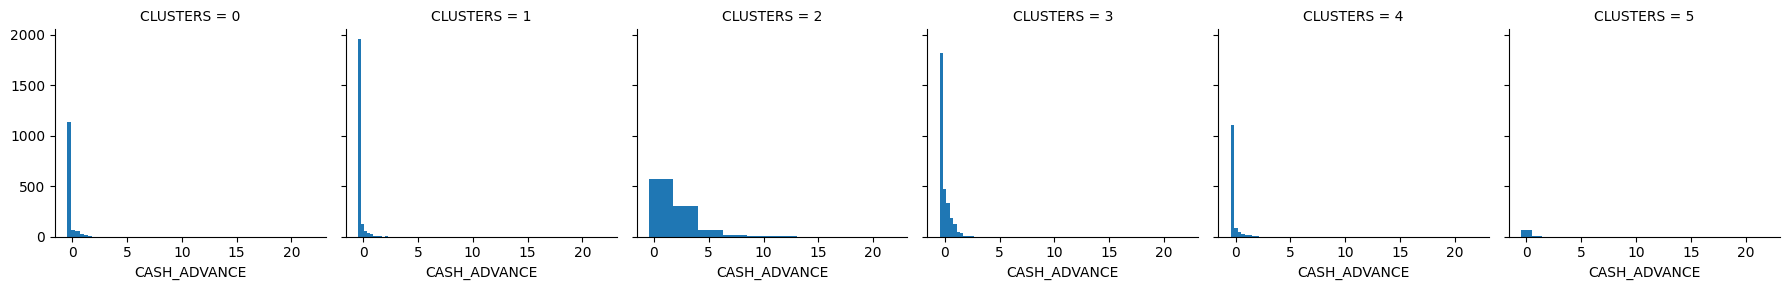

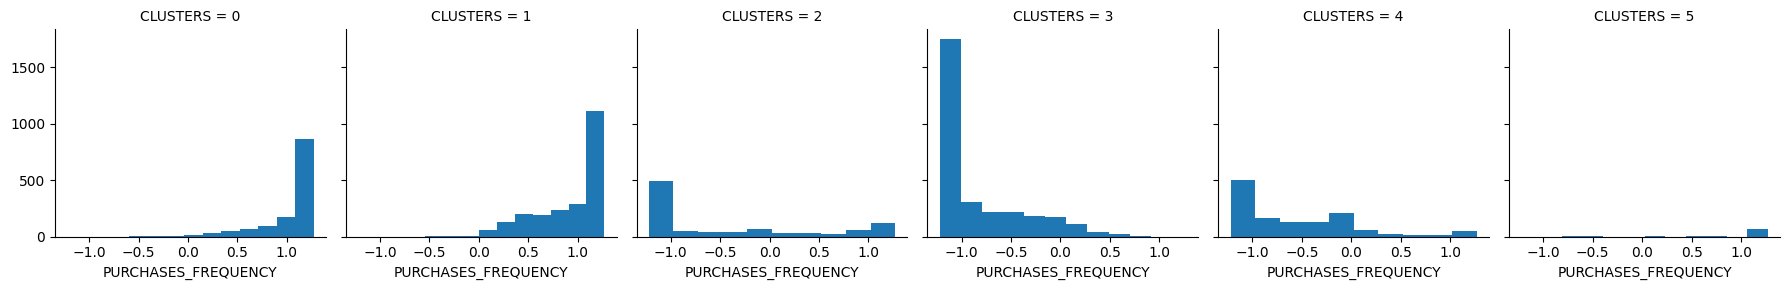

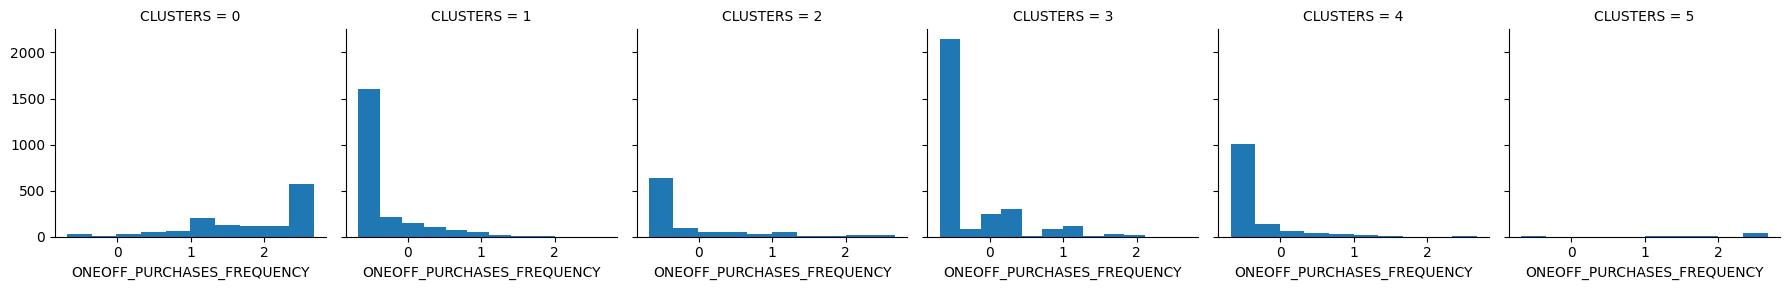

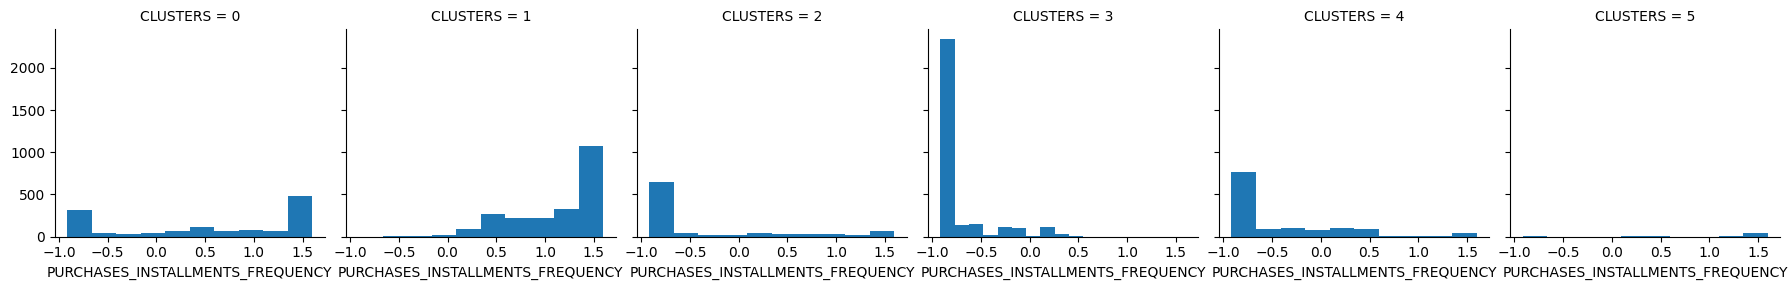

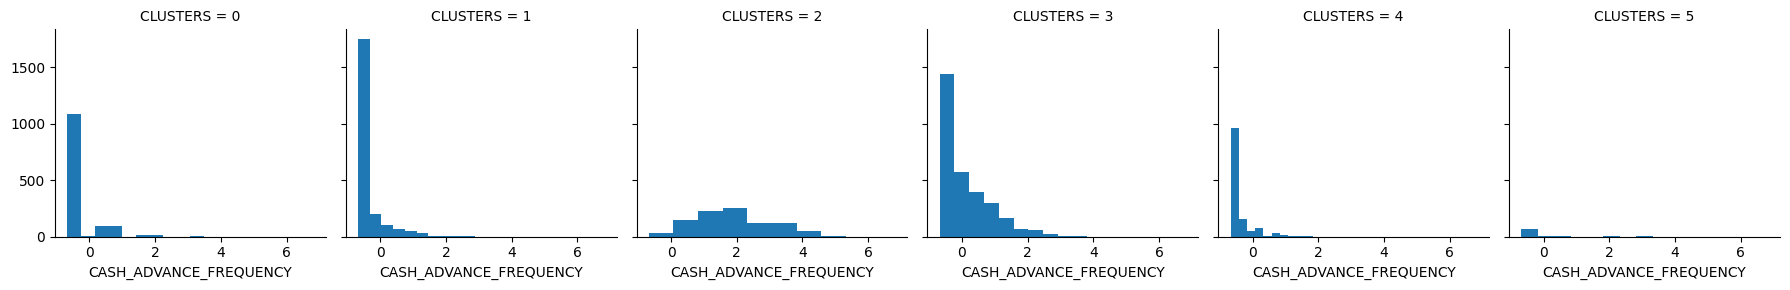

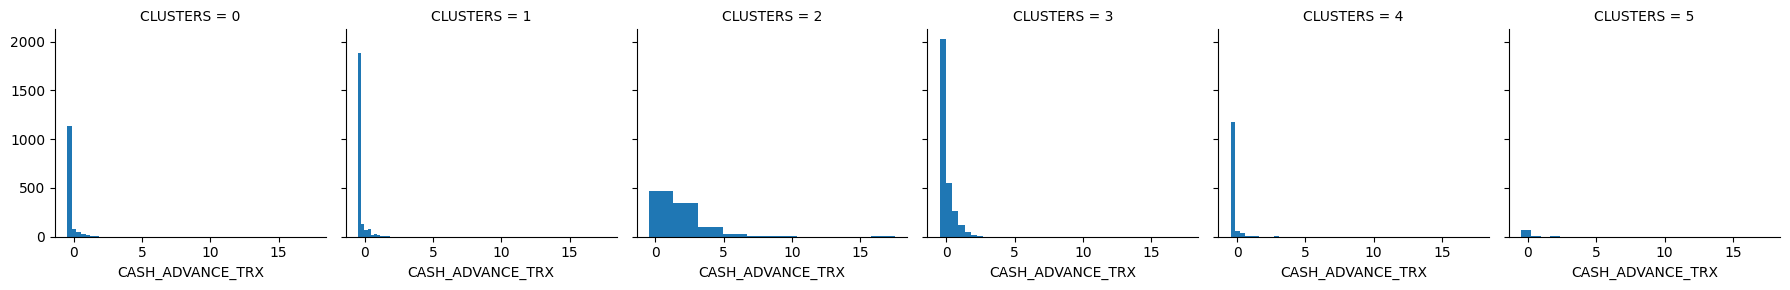

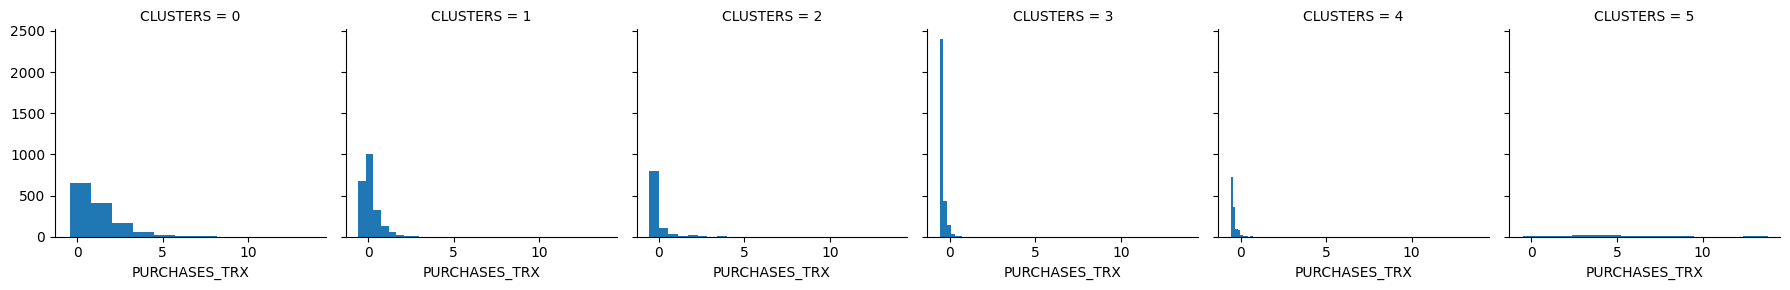

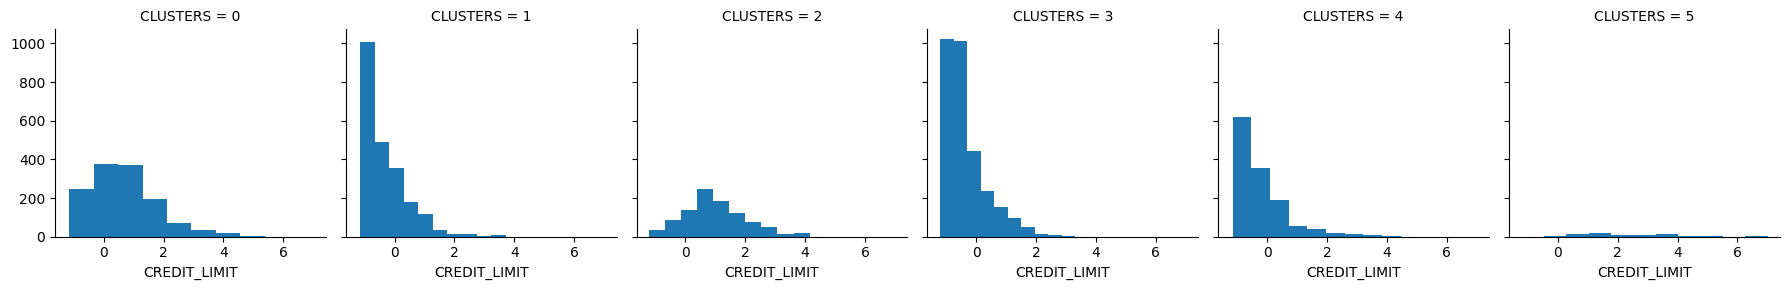

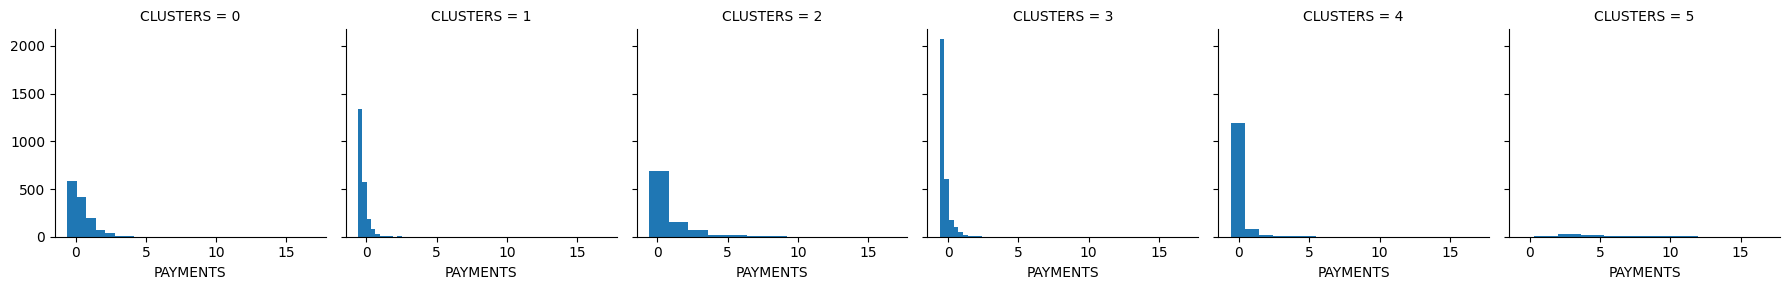

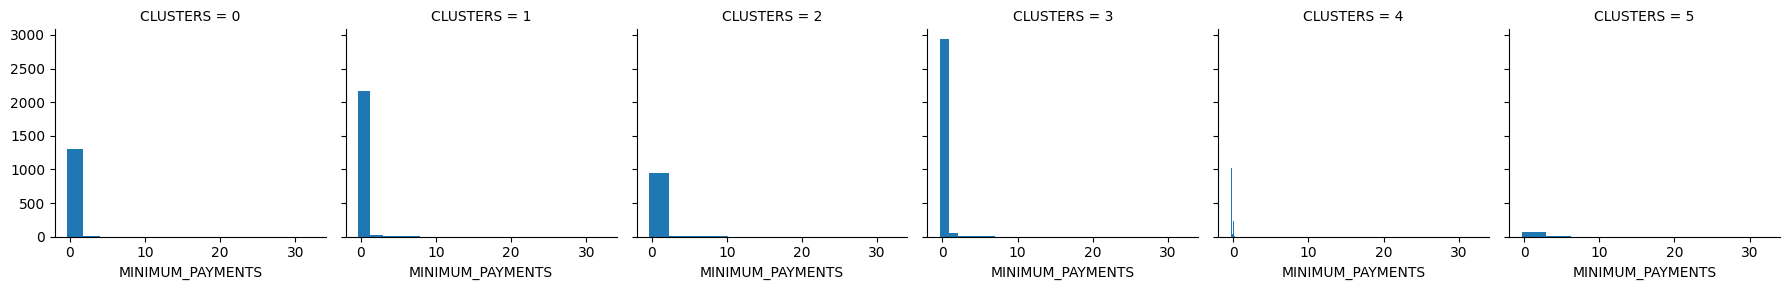

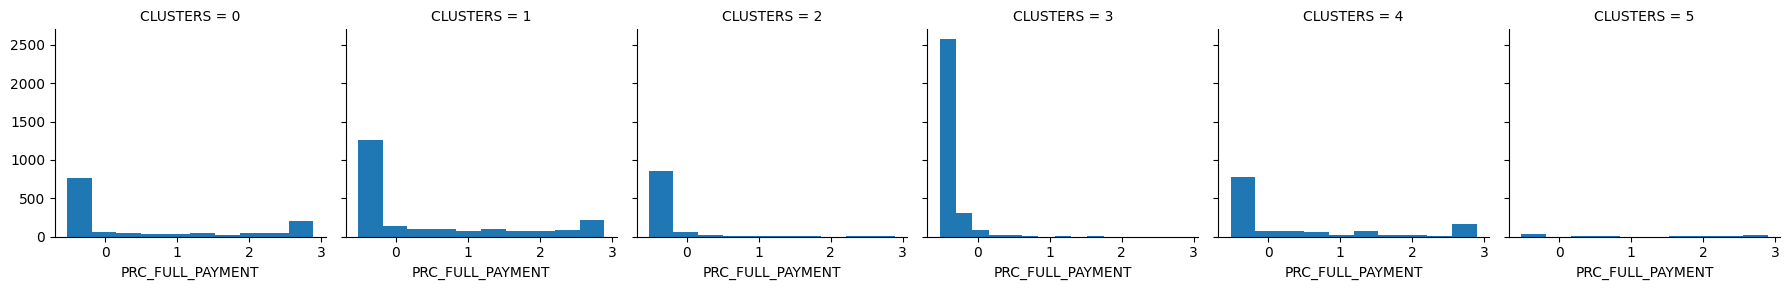

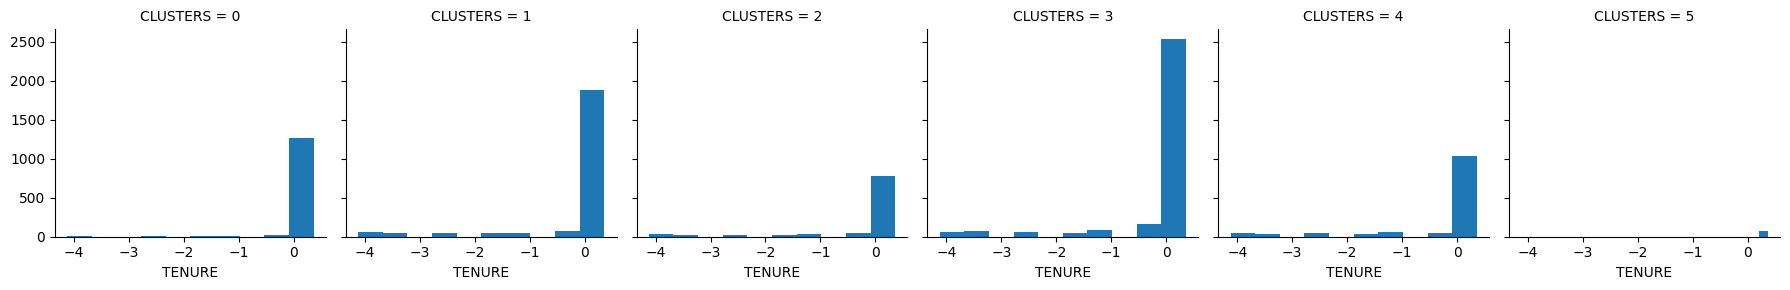

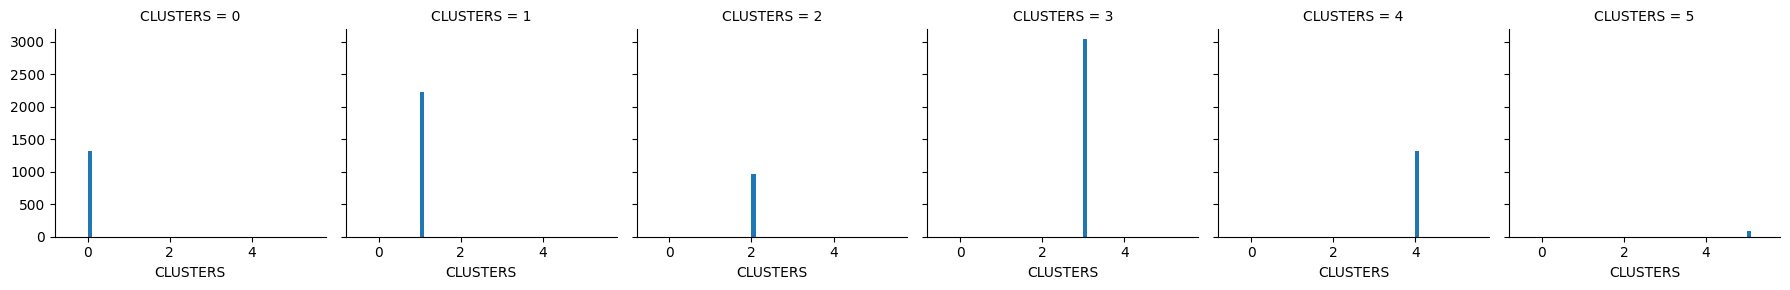

In [120]:
for c in clus_df:
    grid= sns.FacetGrid(clus_df, col='CLUSTERS')
    grid.map(plt.hist, c)

# Save Plot
plt.savefig("clus_km.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**ANALISIS DIAGRAM**
**Ada informasi atau kesimpulan yang didapat dari visualisasi di atas yang terdapat pada masing-masing Cluster:**</br>
<li><b>Cluster 0</b>
<ul>
     1. Akun yang memiliki jumlah saldo yang cukup tinggi</br>
     2. Frekuensi pembelian cukup tinggi</br>
     3. Kredit limit yang cukup besar</br>
     4. Suku bunga yang tinggi</br>
     5. Memiliki tenor yang lama </br>
     6. Jumlah pengguna lebih sedikit dari cluster 1 dan 3
</ul>
</li>
<br>
<li><b>Cluster 1</b>
<ul>
     1. Akun yang memiliki jumlah saldo yang rendah</br>
     2. Frekuensi pembelian tinggi</br>
     3. Kredit limit yang sedang</br>
     4. Suku bunga tidak terlalu tinggi</br>
     5. Memiliki tenor yang lebih panjang dibanding cluster 0 </br>
     6. Jumlah pengguna lebih sedikit dari cluster 3
</ul>
</li>
<br>
<li><b>Cluster 2</b>
<ul>
     1. Akun yang memiliki jumlah saldo tinggi</br>
     2. Frekuensi pembelian rata-rata/sedang</br>
     3. Kredit limit yang cukup tinggi</br>
     4. Suku bunga berada pada rata-rata</br>
     5. Memiliki tenor yang lebih singkat dibanding cluster 1 </br>
     6. Jumlah pengguna lebih banyak dari cluster 5
</ul>
</li>
<br>
<li><b>Cluster 3</b>
<ul>
     1. Akun yang memiliki jumlah saldo yang cukup tinggi/br>
     2. Frekuensi pembelian rata-rata</br>
     3. Kredit limit berada pada tingkat rata-rata</br>
     4. Suku bunga sedikit lebih tinggi dari rata-rata</br>
     5. Memiliki tenor yang lebih panjang dibanding cluster 2 </br>
     6. Jumlah pengguna paling banyak dari semua cluster
</ul>
</li>
<br>
<li><b>Cluster 4</b>
<ul>
     1. Akun yang memiliki jumlah saldo yang sangat rendah</br>
     2. Frekuensi pembelian diatas rata-rata</br>
     3. Kredit limit yang diatas rata-rata</br>
     4. Suku bunga sebesar 2x lipat dari cluster 2</br>
     5. Memiliki tenor yang lebih panjang dibanding cluster 1,2, dan 3 </br>
     6. Jumlah pengguna lebih sedikit dari cluster 0, 1, dan 3 tetapi lebih banyak dari cluster 2 dan 5
</ul>
</li>
<br>
<li><b>Cluster 5</b>
<ul>
     1. Akun yang memiliki jumlah saldo yang sangat tinggi</br>
     2. Frekuensi pembelian paling tinggi dari semua cluster</br>
     3. Kredit limit yang besar</br>
     4. Suku bunga paling rendah dari semua cluster</br>
     5. Memiliki tenor yang paling singkat</br>
     6. Jumlah pengguna paling sedikit di antara semua cluster
</ul>
</li>

In [121]:
#Mengonversi beberapa kolom ke dalam bentuk numpy array
Z = clus_df[['BALANCE','PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'TENURE','PRC_FULL_PAYMENT']].to_numpy()

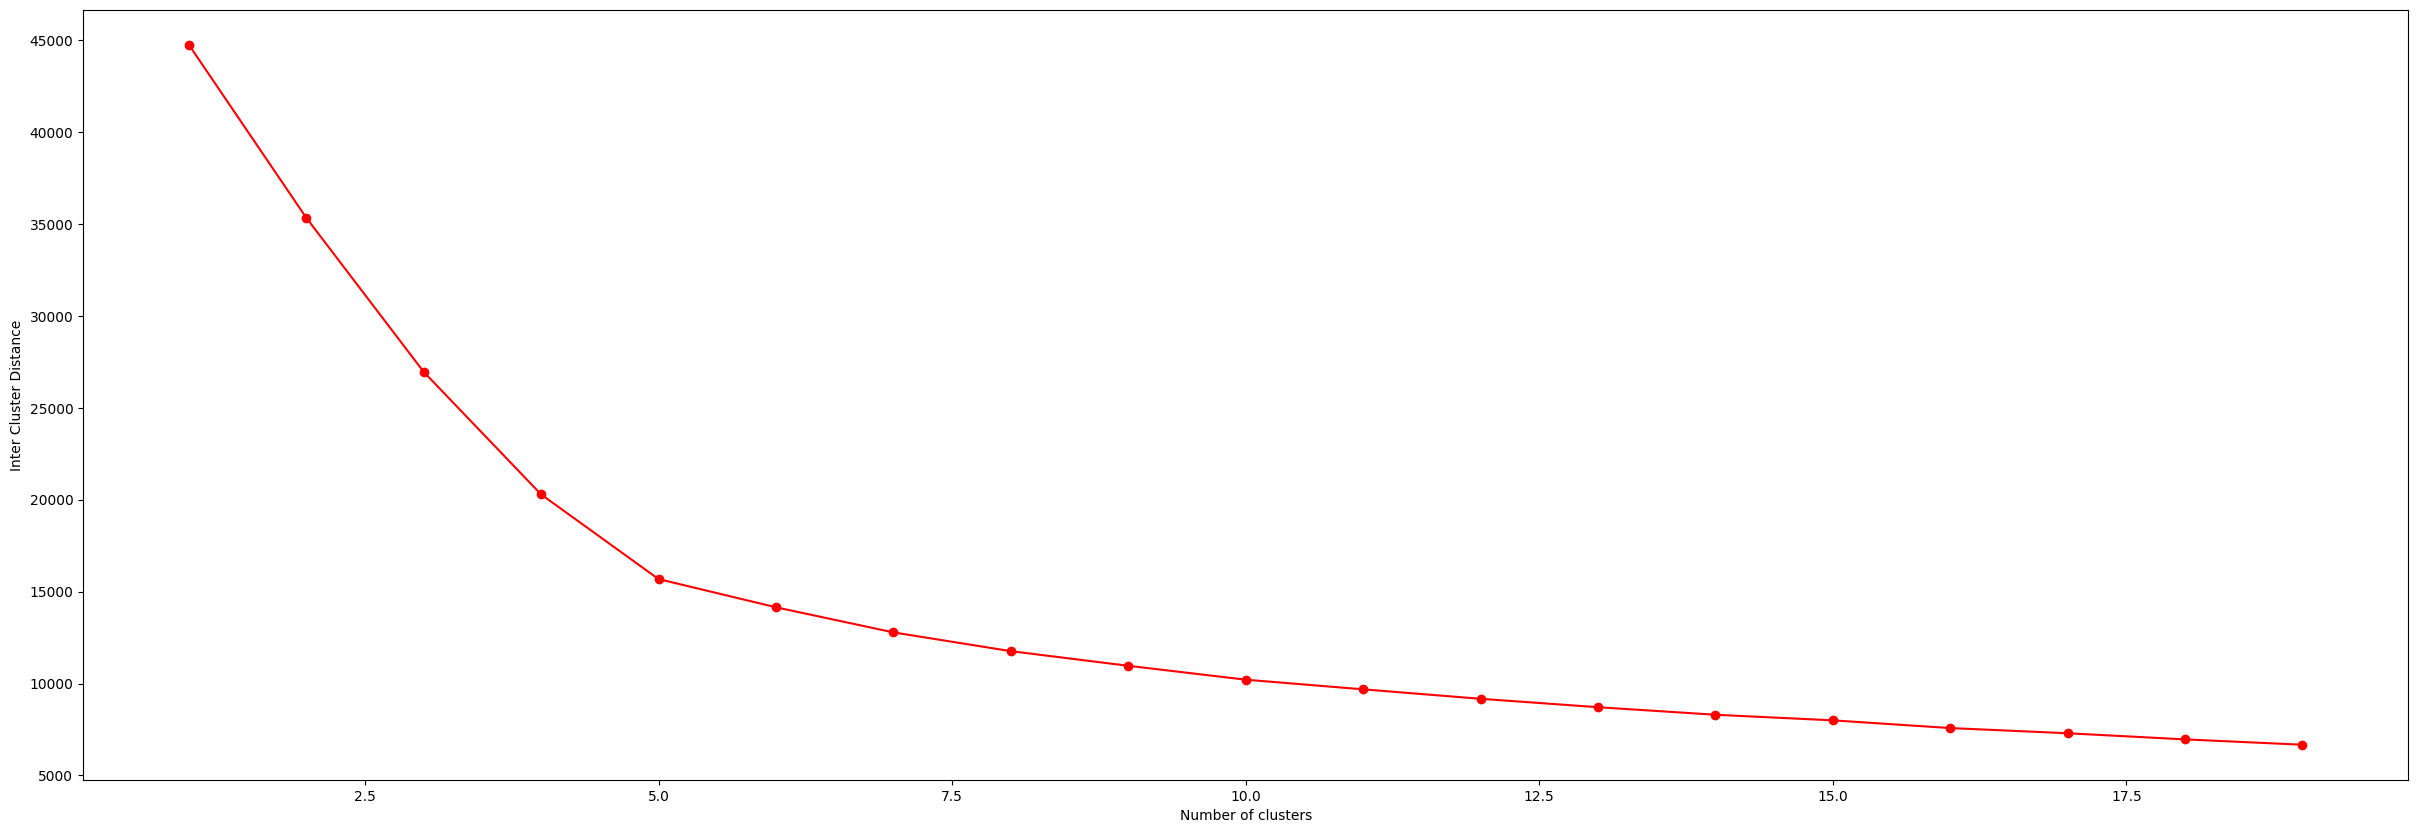

<Figure size 640x480 with 0 Axes>

In [122]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(Z)
    interclusterdistance.append(km.inertia_)

#plotting the values
plt.figure(figsize=(30,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

# Save Plot
plt.savefig("kmeans1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [123]:
km = KMeans(n_clusters = 6,init ='k-means++', max_iter=300,random_state=42)
model2=km.fit(Z)
y_balance_pred = km.predict(Z)

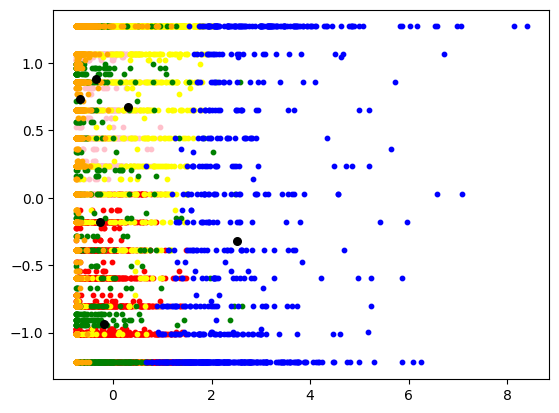

<Figure size 640x480 with 0 Axes>

In [124]:
plt.scatter(Z[y_balance_pred==0, 0], Z[y_balance_pred==0, 1], s=10, c='pink', label ='Cluster 1')
plt.scatter(Z[y_balance_pred==1, 0], Z[y_balance_pred==1, 1], s=10, c='red', label ='Cluster 2')
plt.scatter(Z[y_balance_pred==2, 0], Z[y_balance_pred==2, 1], s=10, c='yellow', label ='Cluster 3')
plt.scatter(Z[y_balance_pred==3, 0], Z[y_balance_pred==3, 1], s=10, c='green', label ='Cluster 4')
plt.scatter(Z[y_balance_pred==4, 0], Z[y_balance_pred==4, 1], s=10, c='orange', label ='Cluster 5')
plt.scatter(Z[y_balance_pred==5, 0], Z[y_balance_pred==5, 1], s=10, c='blue', label ='Cluster 6')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=30, c='black', label = 'Centroids')
plt.show()

# Save Plot
plt.savefig("kmeans2.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

###Model 3: Hierarchical Clustering

In [125]:
model3 = hc.fit(data_scaled)
y_pred3 = hc.fit_predict(data_scaled)

In [126]:
#Memprediksi Clusters untuk data dan membuat kolom baru bernama Clusters serta menampilkan 10 kolom teratas
hc_df = pd.DataFrame(df_copy,columns = df_copy.columns)
hc_df['CLUSTERS'] = y_pred3
hc_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1


In [127]:
#Melihat informasi detail dari clus_df
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

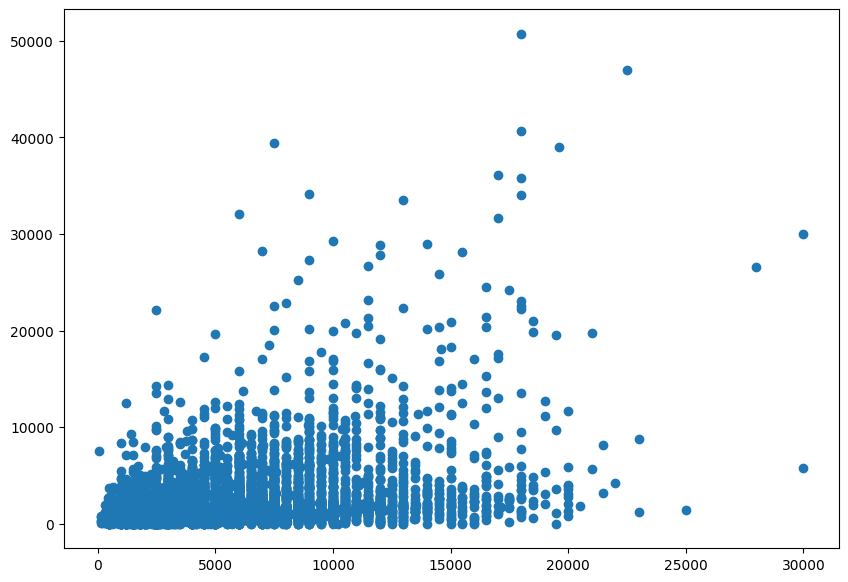

In [128]:
plt.figure(figsize=(10, 7))
plt.scatter(hc_df['CREDIT_LIMIT'], hc_df['PAYMENTS'])

# Save Plot
plt.savefig("hc1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

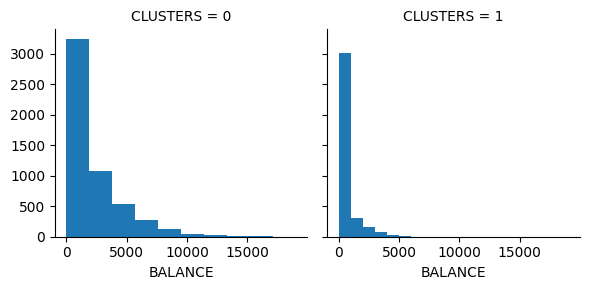

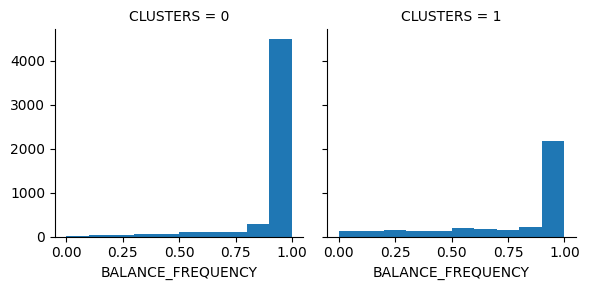

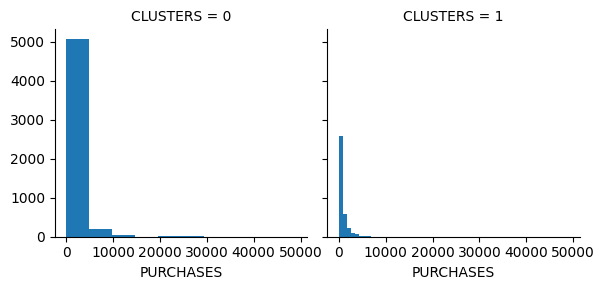

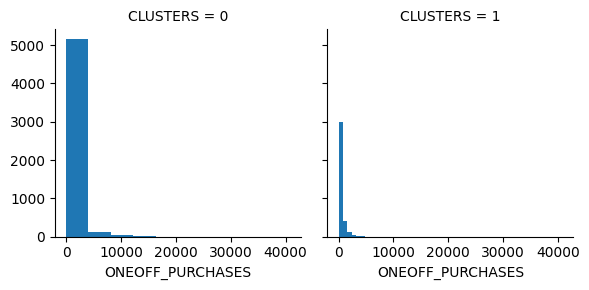

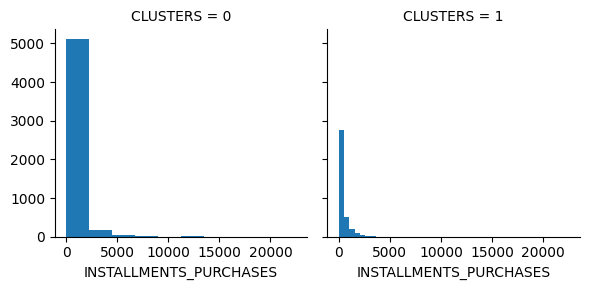

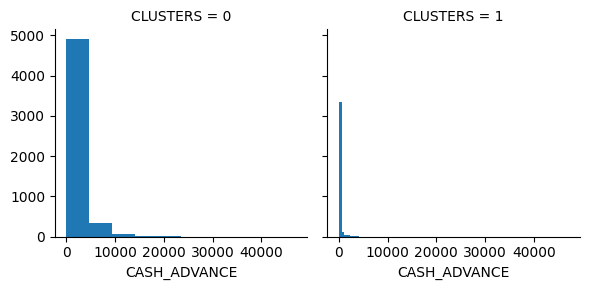

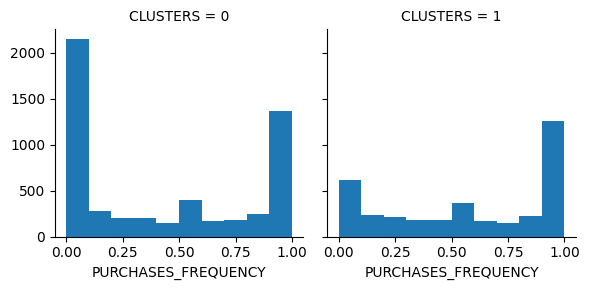

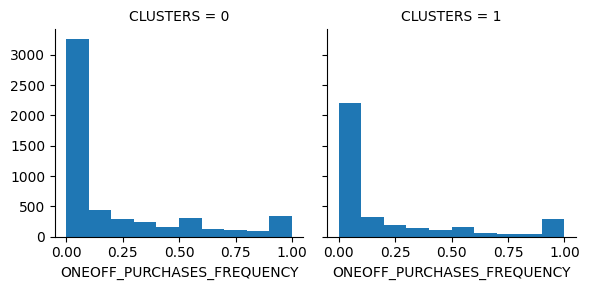

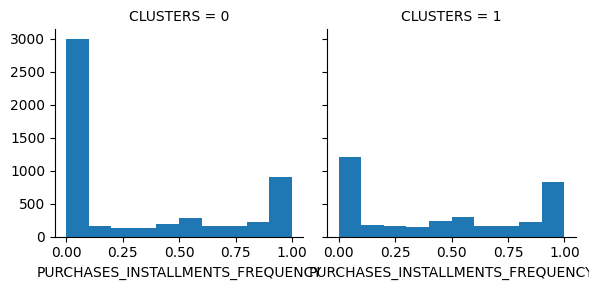

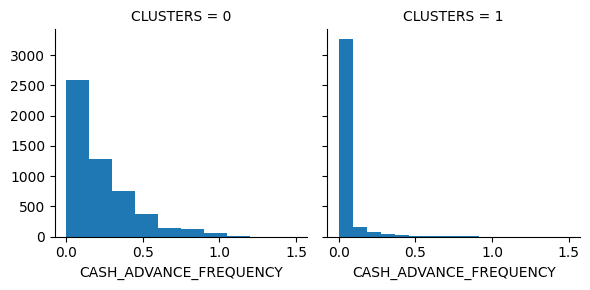

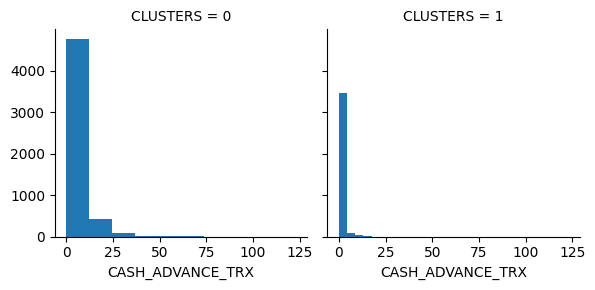

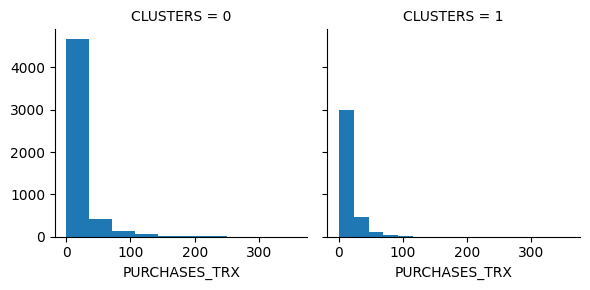

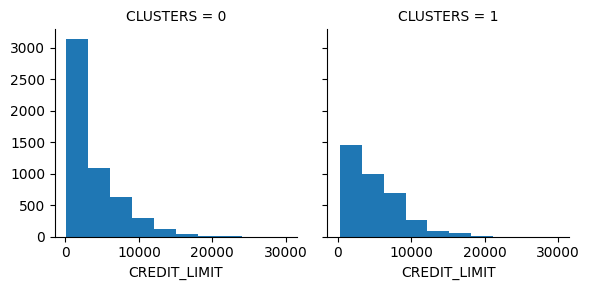

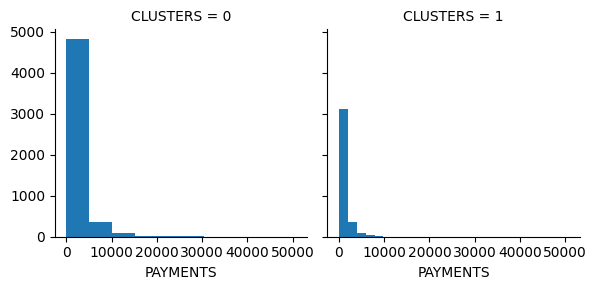

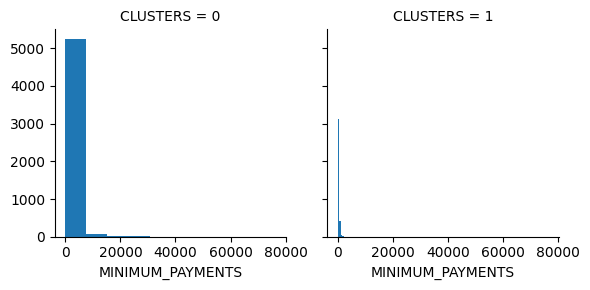

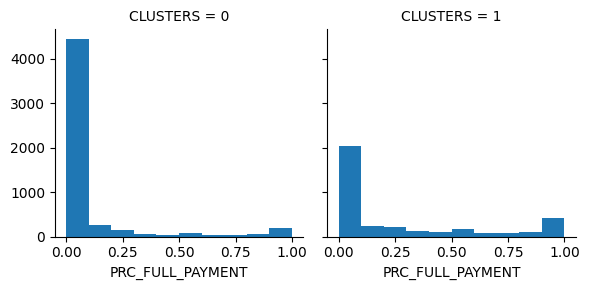

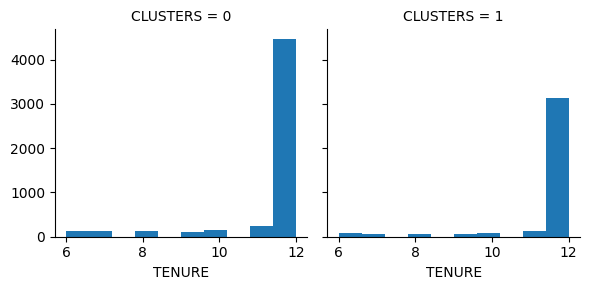

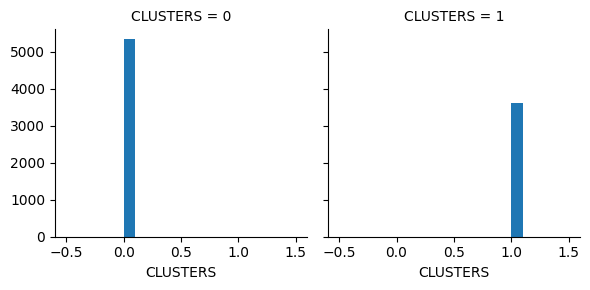

In [129]:
for c in hc_df:
    grid= sns.FacetGrid(hc_df, col='CLUSTERS')
    grid.map(plt.hist, c)

# Save Plot
plt.savefig("hc2.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**ANALISIS DIAGRAM**
<li><b>Cluster 0</b>
<ul>
     1. Jumlah pengguna lebih banyak dari Cluster 1</br>
     2. Pengguna yang telah membayar <i>credit card</i> lebih dari 4000 pengguna</br>
     3. pengguna yang memiliki kredit limit dibawah 10000 (< 10000) lebih banyak dari cluster 1</br>
     4.Jumlah pengguna yang memiliki suku bunga dibawah 0.25 lebih banyak dibandingkan Cluster 1</br>
     5. Jumlah pengguna yang memliki tenor pembayaran lebih banyak dibandingkan cluster 1</br>
</ul>
</li>
<br>
<li><b>Cluster 1</b>
<ul>
     1. Jumlah pengguna lebih sedikit dari Cluster 0</br>
     2. Pengguna yang telah membayar <i>credit card</i> lebih dari 3000 pengguna</br>
     3. Pengguna yang memiliki kredit limit dibawah 10000 (< 10000) lebih sedikit dari cluster 0</br>
     4. Jumlah pengguna yang memiliki suku bunga di antara 0.5 s/d 1.0 lebih banyak dibandingkan cluster 0,</br>
     5. Jumlah pengguna yang memliki tenor pembayaran lebih sedikit dibandingkan cluster 0</br>
</ul>
</li>

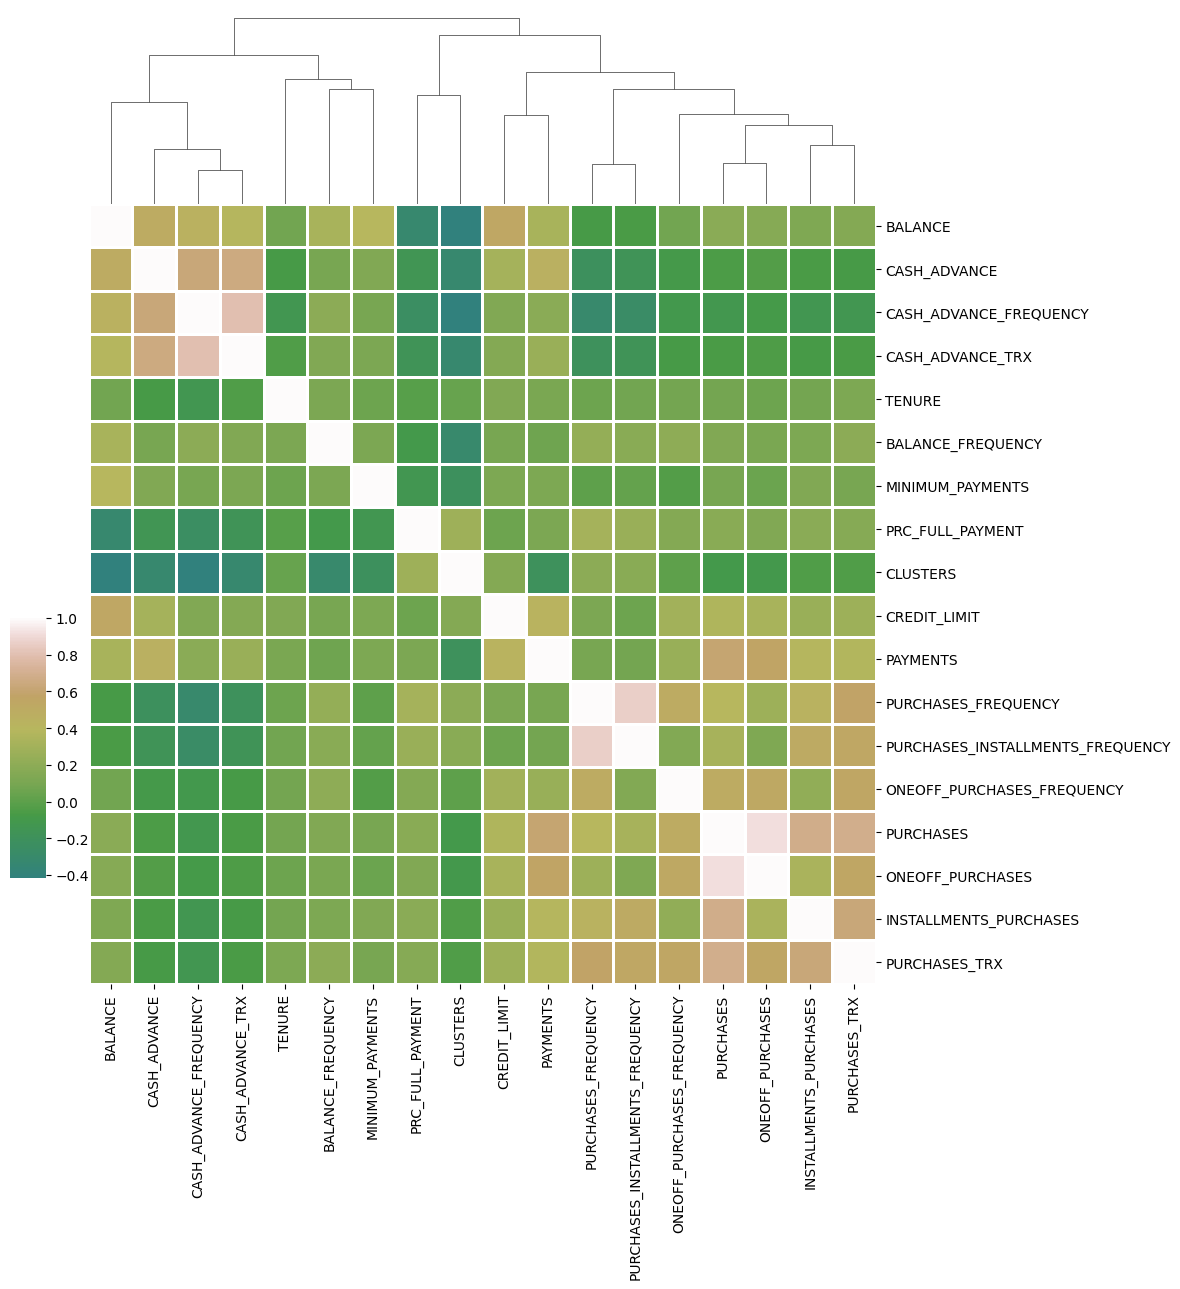

In [130]:
# Full Plot
g = sns.clustermap(hc_df.corr(), center=0, cmap="gist_earth",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

# Remove ax row
g.ax_row_dendrogram.remove()

# Save Plot
plt.savefig("hc3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Clustermap adalah visualisasi data yang digunakan untuk memetakan hubungan antar atribut dalam dataset dan dapat membantu mengidentifikasi kelompok atau cluster dalam data serta memvisualisasikan hubungan dari atribut-atribut tersebut. Cara kerjanya adalah dengan membuat matriks jarak antar atribut, penggunaan algoritma clustering seperti hierarchical clustering, dan pemetaan objek ke dalam tampilan grafis berdasarkan dendrogram.

## I. Model Inference

Model Inference ini hanya akan diaplikasikan ke Model K-Means. Hal ini karena K-Means adalah algoritma clustering yang menghasilkan model yang dapat digunakan secara langsung untuk melakukan prediksi pada data baru. Setelah K-Means selesai melatih dan mengelompokkan data, model K-Means ini bisa digunakan untuk mengklasifikasikan data baru ke dalam salah satu cluster yang sudah ada.
</br>
</br>
Sedangkan untuk model DBSCAN dan Hierarchical Clustering bukan merupakan algoritma yang menghasilkan Inference Model yang dapat digunakan secara langsung untuk melakukan prediksi pada data baru. Kedua model tersebut, DBSCAN dan Hierarchical Clustering adalah algoritma clustering yang digunakan untuk mengelompokkan data ke dalam cluster berdasarkan karakteristik tertentu.

In [131]:
df_deploy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [132]:
BALANCE = float(input("BALANCE: "))
PURCHASES = float(input("PURCHASES: "))
CREDIT_LIMIT = float(input("CREDIT_LIMIT: "))
PAYMENTS = float(input("PAYMENTS: "))
TENURE = float(input("TENURE: "))

feature = [
    BALANCE,
    PURCHASES,
    CREDIT_LIMIT,
    PAYMENTS,
    TENURE
]

feature = scaler.fit_transform([feature])
predict = km.predict(feature)

print("Cluster : ",predict)

BALANCE: 56.7723
PURCHASES: 88.2
CREDIT_LIMIT: 900
PAYMENTS: 110.3321
TENURE: 9
Cluster :  [1]


##J. Kesimpulan

1. Pada Dataset kali ini memiliki lebih sedikit Missing Values dibanding dengan dataset-dataset pada pengerjaan-pengerjaan yang sebelumnya.
2. Meskipun demikian, dataset pada pengerjaan kali ini memiliki tingkat skewness yang lebih tinggi terutama positive skewness.
3. Dari correlation matrix yang telah dibuat, bisa diketahui bahwa kolom PAYMENTS dan PURCHASES memiliki korelasi yang sangat kuat dalam menentukan seberapa tertarik user dalam menggunakan creditcard
4. Pada analisis diagram Cluster terdapat beberapa informasi yang bisa diperoleh, seperti:
<ul>- Tinggi/rendahnya jumlah saldo</ul>
<ul>- Tinggi/rendahnya frekuensi pembelian</ul>
<ul>- Tingkat kredit limit</ul>
<ul>- Tingkat suku bunga</ul>
<ul>- Seberapa panjang tenor nya</ul>
<ul>- Jumlah pengguna di setiap Cluster dibandingkan Cluster lain</ul>

